
# Цель исследования

Изучить полученные данные, найти закономерности и особенности на рынке недвижимости.

# Основные этапы исследования

1. Необходимо провести предобработку данных, избавиться от пропусков, дубликатов и аномальных значений, которые могут искажать реальную картину
2. Исследовать данные сами по себе, а также их влияние друг на друга и зависимсоти между ними.
3. Предложить возможные улучшения по работе платформы.

# Ознакомление с данными

Импортирую все необходимые для работы бибилотеки.

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import calendar

import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

## Первый взгляд и общая информация о датасете

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1              NaN          11.0        18.60      1          NaN  ...   
2              NaN           5.0        34.30      4          NaN  ...   
3              NaN          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5              NaN          12.0        14.40      5          NaN  ...   
6              NaN          26.0        10.60      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
8              NaN          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11             NaN           5.0        31.00      4        False  ...   
12             NaN           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14             NaN           6.0        17.00      1          NaN  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            Санкт-Петербург           18863.0   
1          11.00      2.0             посёлок Шушары           12817.0   
2           8.30      0.0            Санкт-Петербург           21741.0   
3            NaN      0.0            Санкт-Петербург           28098.0   
4          41.00      NaN            Санкт-Петербург           31856.0   
5           9.10      NaN  городской посёлок Янино-1               NaN   
6          14.40      1.0          посёлок Парголово           52996.0   
7          18.90      2.0            Санкт-Петербург           23982.0   
8           8.81      NaN             посёлок Мурино               NaN   
9           6.50      2.0            Санкт-Петербург           50898.0   
10          8.50      NaN            Санкт-Петербург           38357.0   
11          6.00      1.0                  Ломоносов           48252.0   
12          9.00      0.0                  Сертолово               NaN   
13          5.20      1.0                   Петергоф           37868.0   
14          8.00      0.0                     Пушкин           20782.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   
5                  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметно наличие пропусков в различных столбцах. Вызывает интерес столбец ```is_appartment```, который практически весь состоит из пропусков и содержит данные типа строка.

Сразу приведем все названия столбцов к змеиному формату.

In [4]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 
                            'parks_around3000' : 'parks_around_3000', 
                            'ponds_around3000' : 'ponds_around_3000'})

Построим гисторграмму по всем данным из датасета.

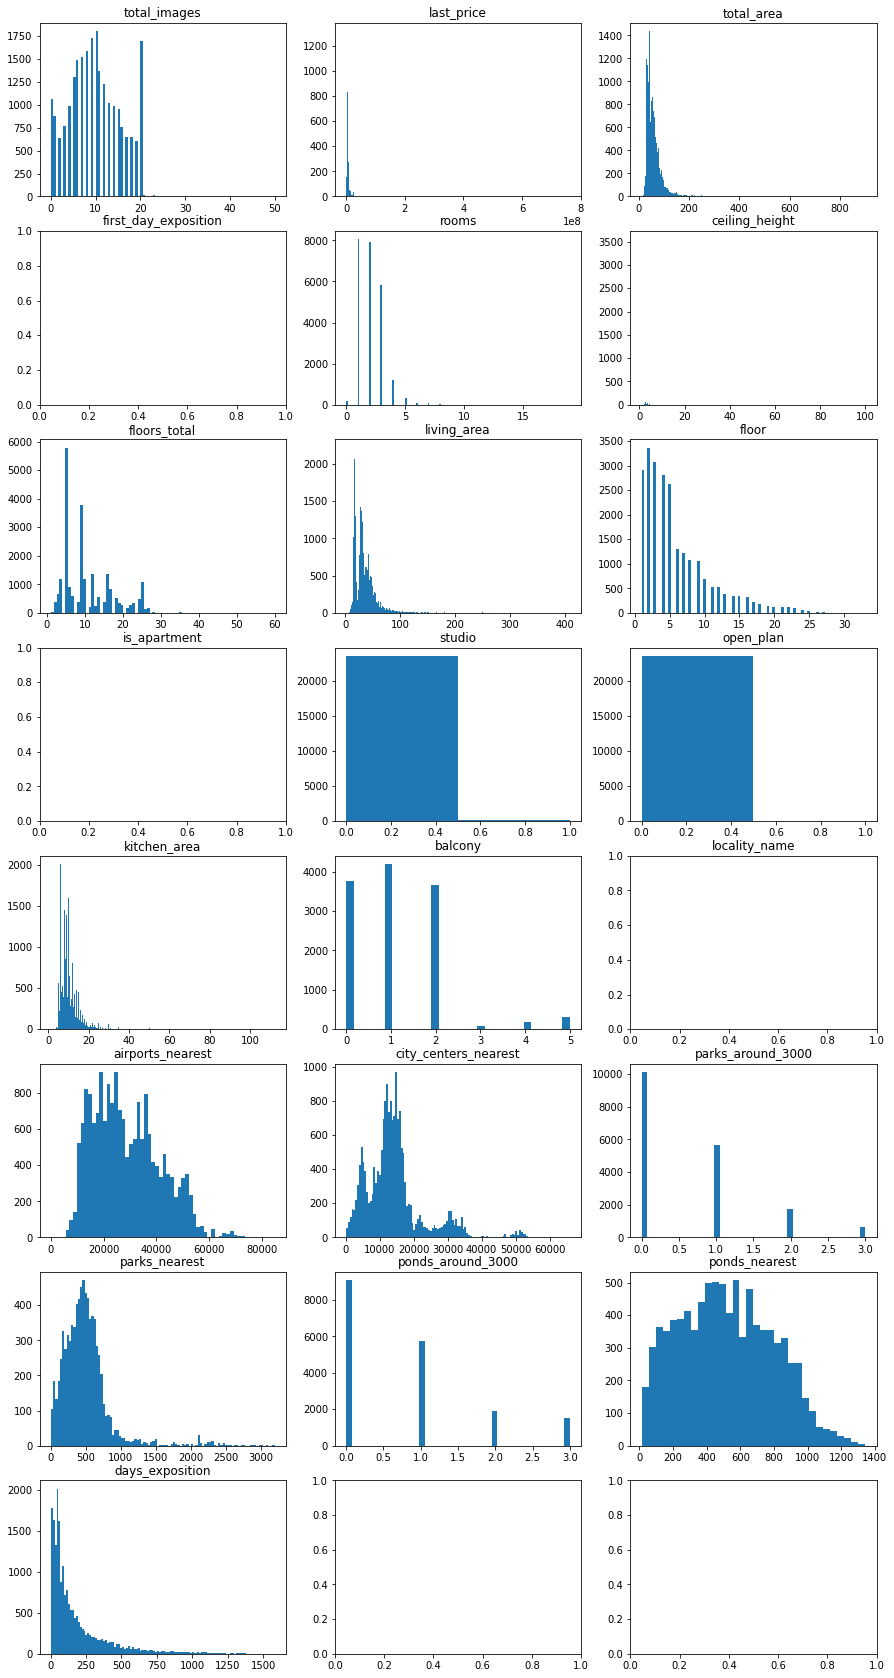

In [5]:
features = list(data.columns)

figure, ((ax0, ax1, ax2), 
         (ax3, ax4, ax5), 
         (ax6, ax7, ax8), 
         (ax9, ax10, ax11), 
         (ax12, ax13, ax14), 
         (ax15, ax16, ax17),
         (ax18, ax19, ax20),
         (ax21, ax22, ax23)) = plt.subplots(nrows=8, ncols=3, figsize=(15, 30))

plots = [ax0, ax1, ax2, 
         ax3, ax4, ax5, 
         ax6, ax7, ax8, 
         ax9, ax10, ax11,
         ax12, ax13, ax14,
         ax15, ax16, ax17,
         ax18, ax19, ax20,
         ax21, ax22, ax23]
i = 0
while i < len(features):
    if str(data[features[i]].dtype) == 'bool':
        plots[i].hist(data[features[i]].replace({True:1, False:0}), bins=2)
        plots[i].set_title(features[i])
    elif str(data[features[i]].dtype) == 'object':
        plots[i].set_title(features[i])
    else:
        plots[i].hist(data=data, x=features[i], bins='auto')
        plots[i].set_title(features[i])
    i += 1
plt.show()

  
Большинство графиков достаточно информативны, но есть и такие по которым трудно что-то сказать, например, гистограмма ```last_price``` или ```ceiling_height```.
  

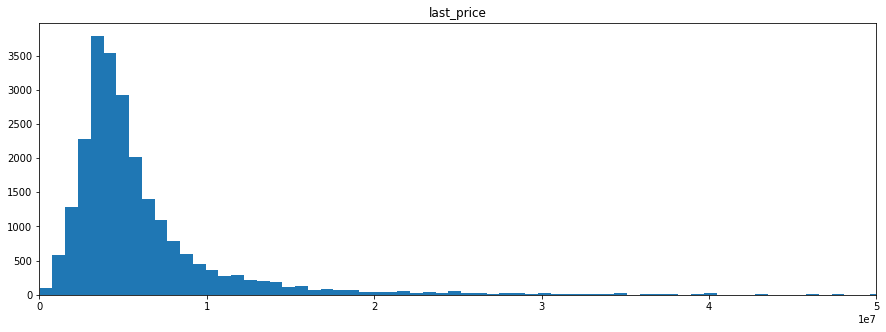

In [6]:
figure, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))
ax.hist(data['last_price'], bins=1000)
ax.set_xlim(0, 50000000)
ax.set_title('last_price');

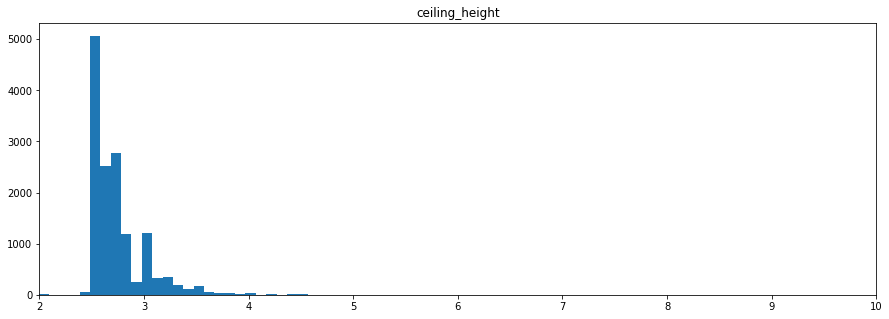

In [7]:
figure, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))
ax.hist(data['ceiling_height'], bins=1000)
ax.set_xlim(2, 10)
ax.set_title('ceiling_height');

Теперь гистограммы для всех столбцов датасета более наглядны.
Уже можно заметить определенные закономерности, например, гораздо больше объявлений с квартирами, которые находятся до 5 этажа, что логично: в любой высотке есть 5 этаж, как и в любой пятиэтажке, а 9, 15 и 25 этажем могут похвастаться только высотные дома.
Видимые закономрености лишь предварительный взгляд, необходимо провести предобработку данных, избавиться от пропусков, дубликатов, редких и подозрительных значений.

# Предобработка данных

## Работа с пропусками

Сначала рассмотрим столбцы ```balcony```, ```parks_around_3000``` и ```ponds_around_3000```. В них есть достаточное количество пропусков. 
Если количество балконов в квартире или парков и водоемов в радиусе 3 км не указано, то вероятно их и нет. Проверим это предположение для пакров и водоемов.

In [8]:
print(data.query('ponds_around_3000 == 0 or ponds_around_3000.isna()')['ponds_nearest'].unique())
print(data.query('parks_around_3000 == 0 or parks_around_3000.isna()')['parks_nearest'].unique())

[nan]
[  nan 3064. 3190. 3013.]


Похоже предположение верно, для строк где в столбцах ```parks_around_3000``` и ```ponds_around_3000``` указан 0 или имеется пропуск в столбце с указанием растояния до ближайшего парка или водема либо пропуски, либо расстояние превышающее 3 км.

Поэтому пропуски заполним нулями во всех трех столбцах.

In [9]:
data[['balcony', 'ponds_around_3000', 'parks_around_3000']] = (data[['balcony', 'ponds_around_3000', 'parks_around_3000']]
                                                             .fillna(0)
                                                             .convert_dtypes()
                                                            ) #заменяем пропуски на нули и изменяем тип данных на целые числа

Во всех исправленных столбцах теперь значения - это целые чила, а все пропуски заполнены нулями.

В столбце ```locality_name``` с информацией о населенном пункте тоже есть пропуски, их совсем мало, пока заменим их на ```'unknown'```

In [10]:
data['locality_name'] = data['locality_name'].fillna('unknown') #вместо пропущенных названий населнных пунктов укажем значения 'unknown'

Посмотрим какой процент пропусков в каждом из столбцов остался. Если пропусков меньше 5% можно удалить такие данные, это не окажет значительного влияния на датасет.

In [11]:
data.isna().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000        0.000000
parks_nearest           65.909954
ponds_around_3000        0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [12]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

В столбце ```floors_total``` всего 0,36% данных составляют пропуски, можно просто удалить такие строки.

In [13]:
data_clean = data.dropna(subset=['floors_total'])

А вот столбец ```is_apartment``` выделяется на фоне остальных. Более 88% пропусков. Посмотрим, какие значения есть в данном столбце и посчитаем их количество.

In [14]:
data_clean['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [15]:
print('Не аппратаменты:', 
      len(data_clean.query('is_apartment == False')), 
      f'{len(data_clean.query("is_apartment == False")) / len(data_clean) : .2%}')
print('Апратаменты:', 
      len(data_clean.query('is_apartment == True')), 
      f'{len(data_clean.query("is_apartment == True")) / len(data_clean) : .2%}')
print('Пропуски:', 
      len(data_clean)-len(data_clean.query('is_apartment == False'))-len(data_clean.query('is_apartment == True')), 
      f'{(len(data_clean)-len(data_clean.query("is_apartment == False"))-len(data_clean.query("is_apartment == True"))) / len(data_clean) : .2%}')

Не аппратаменты: 2725  11.54%
Апратаменты: 50  0.21%
Пропуски: 20838  88.25%


Квартиры-аппартаменты составляют менее половины процента от всех данных датасета, этого недостаточно для какого-либо анализа по данному параметру. Изучим строки с квартирами-аппартаментами, возможно получится на основе имеющихся строк заполнить пропуски.

In [16]:
data_clean.query('is_apartment == True').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
543             11  12790000.0        56.6  2018-11-06T00:00:00      2   
916             11   8183000.0        70.0  2018-01-11T00:00:00      2   
1109             1  34878556.0        95.8  2014-12-09T00:00:00      2   
1608            12   2150000.0        20.1  2019-01-30T00:00:00      1   
2759            11   7500000.0       152.0  2018-07-27T00:00:00      3   
2975             9   4931398.0        42.9  2018-07-23T00:00:00      1   
3067            13   6600000.0        95.0  2018-09-08T00:00:00      2   
3816             4   4779000.0        53.1  2016-05-16T00:00:00      1   
3951            10   4300000.0        50.0  2019-04-20T00:00:00      1   
4339            19   6900000.0        72.0  2019-03-25T00:00:00      3   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
543             3.50           3.0        29.40      1         True  ...   
916             3.12           3.0        40.00      3         True  ...   
1109             NaN           6.0        58.30      5         True  ...   
1608             NaN           9.0          NaN      1         True  ...   
2759            3.00           3.0          NaN      1         True  ...   
2975            3.15           4.0        20.39      3         True  ...   
3067            4.50           7.0        45.00      7         True  ...   
3816             NaN          13.0        19.80      6         True  ...   
3951            3.00          11.0        17.00      9         True  ...   
4339            3.50           4.0        70.00      1         True  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
543            NaN        0         Петергоф           35248.0   
916            NaN        2  Санкт-Петербург           45796.0   
1109         20.00        1  Санкт-Петербург           21860.0   
1608           NaN        0  Санкт-Петербург           26646.0   
2759           NaN        1       Всеволожск               NaN   
2975         10.29        0  Санкт-Петербург           44870.0   
3067         25.00        2           Выборг               NaN   
3816         15.90        2  Санкт-Петербург           19396.0   
3951         12.00        2  Санкт-Петербург           10143.0   
4339           NaN        0  Санкт-Петербург           31487.0   

     city_centers_nearest  parks_around_3000  parks_nearest  \
543               30437.0                  3           53.0   
916               21729.0                  0            NaN   
1109                318.0                  2          160.0   
1608              12147.0                  0            NaN   
2759                  NaN                  0            NaN   
2975              20802.0                  0            NaN   
3067                  NaN                  0            NaN   
3816               4516.0                  0            NaN   
3951              11367.0                  0            NaN   
4339               4466.0                  2          353.0   

      ponds_around_3000  ponds_nearest  days_exposition  
543                   3           22.0              NaN  
916                   1          754.0            179.0  
1109                  3          569.0           1572.0  
1608                  0            NaN             13.0  
2759                  0            NaN              7.0  
2975                  1          792.0            273.0  
3067                  0            NaN             96.0  
3816                  1          826.0             60.0  
3951                  0            NaN              NaN  
4339                  1          439.0             22.0  

[10 rows x 22 columns]

Построим общую гистограмму для квартир, которые относятся к аппартаментам.

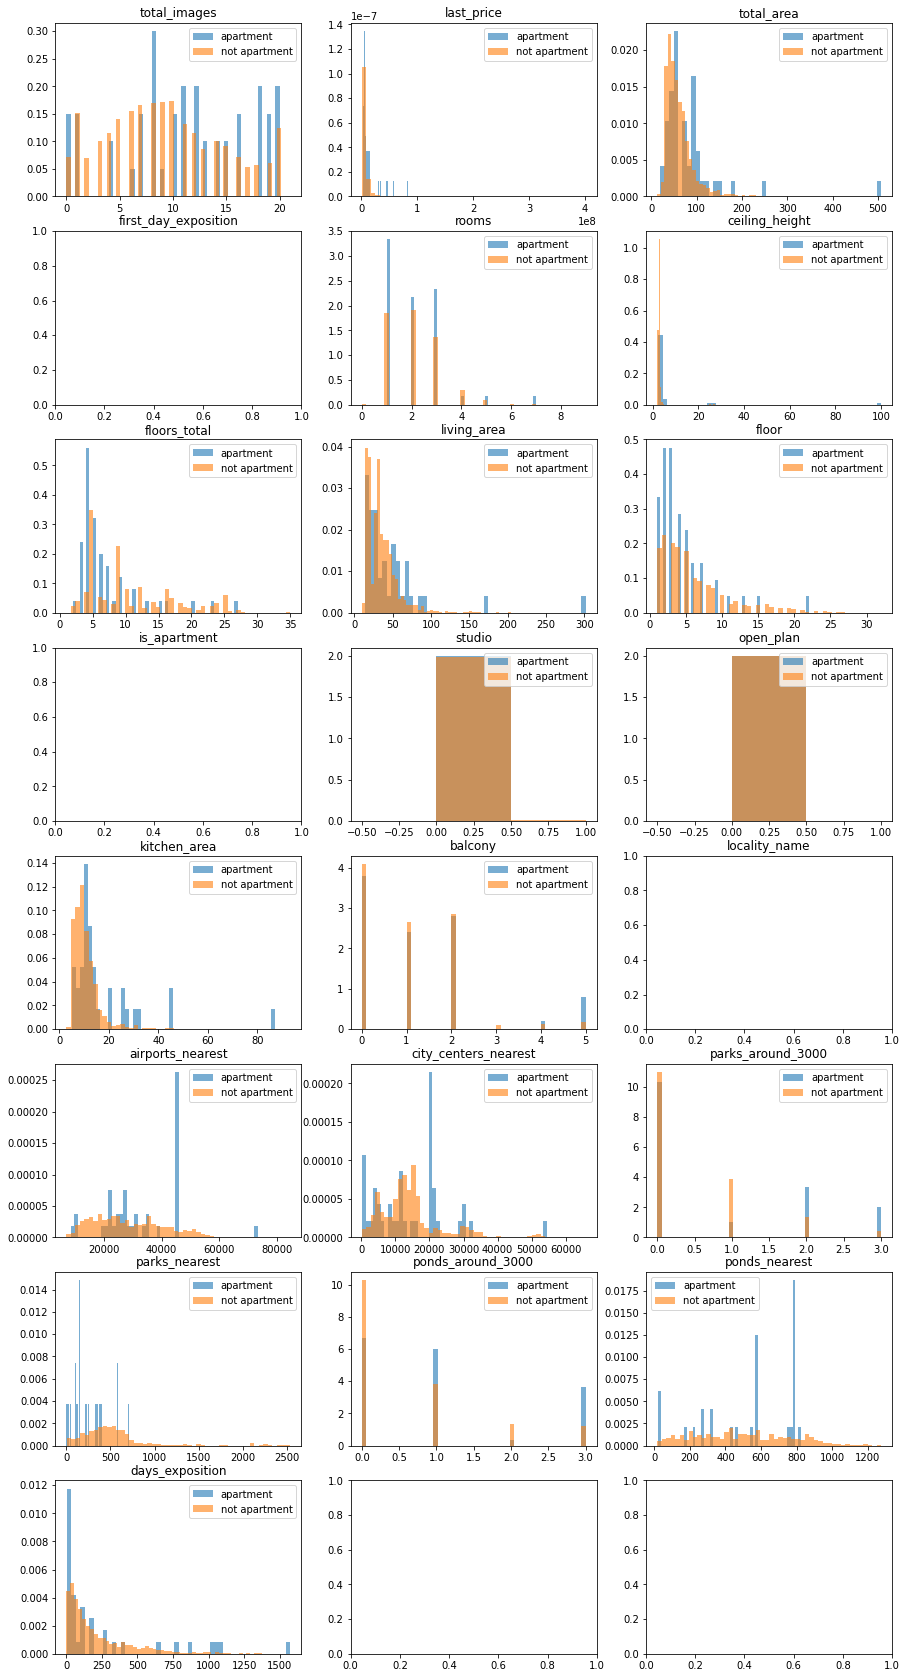

In [17]:
ALPHA = 0.6
features = list(data.columns)

figure, ((ax0, ax1, ax2), 
         (ax3, ax4, ax5), 
         (ax6, ax7, ax8), 
         (ax9, ax10, ax11), 
         (ax12, ax13, ax14), 
         (ax15, ax16, ax17),
         (ax18, ax19, ax20),
         (ax21, ax22, ax23)) = plt.subplots(nrows=8, ncols=3, figsize=(15, 30))

plots = [ax0, ax1, ax2, 
         ax3, ax4, ax5, 
         ax6, ax7, ax8, 
         ax9, ax10, ax11,
         ax12, ax13, ax14,
         ax15, ax16, ax17,
         ax18, ax19, ax20,
         ax21, ax22, ax23]
i = 0
while i < len(features):
    if str(data_clean.query('is_apartment == True')[features[i]].dtype) == 'bool':
        plots[i].hist(data_clean.query('is_apartment == True')[features[i]].replace({True:1, False:0}), 
                      bins=2, 
                      density=True, 
                      alpha=ALPHA,
                      label='apartment')
        plots[i].hist(data_clean.query('is_apartment == False')[features[i]].replace({True:1, False:0}), 
                      bins=2, 
                      density=True, 
                      alpha=ALPHA, 
                      label='not apartment')
        plots[i].set_title(features[i])
        plots[i].legend()
    elif str(data_clean.query('is_apartment == True')[features[i]].dtype) == 'object':
        plots[i].set_title(features[i])
    else:
        plots[i].hist(data=data_clean.query('is_apartment == True'), 
                      x=features[i], 
                      bins=50, 
                      density=True, 
                      alpha=ALPHA, 
                      label='apartment')
        plots[i].hist(data=data_clean.query('is_apartment == False'), 
                      x=features[i], 
                      bins=50, 
                      density=True, 
                      alpha=ALPHA, 
                      label='not apartment')
        plots[i].set_title(features[i])
        plots[i].legend()
    i += 1

plt.show()

Распределения признаков выглядят похоже как для аппартаментов, так и для не аппартаментов.

Возможно тип аппартаменты зависит от значений в столбцах ```open_plan``` и ```studio```.

In [18]:
display(data_clean.query('is_apartment == True')[['is_apartment', 'open_plan', 'studio']].head())
display(data_clean.query('is_apartment == False')[['is_apartment', 'open_plan', 'studio']].head())

is_apartment  open_plan  studio
543          True      False   False
916          True      False   False
1109         True      False   False
1608         True      False   False
2759         True      False   False

is_apartment  open_plan  studio
11        False      False   False
25        False      False   False
29        False      False   False
36        False      False   False
41        False      False   False

Значение столбца ```is_apartment``` не зависит от того, что указано в столбцах ```open_plan``` и ```studio```. Соответственно заполнить пропуски в соответствии с каким-то правилом не получится, либо это правило слишком неочевидно, чтобы его определить. 

Вероятно эти пропуски появились при выгрузке данных, слишком много пропусков, в отличие от похожих столбцов ```open_plan``` и ```studio```.

Заметное количество пропусков имеется в столбцах:
* ```ceiling_height```
* ```living_area```
* ```kitchen_area```
* ```airports_nearest```
* ```city_centers_nearest```
* ```parks_nearest```
* ```ponds_nearest```
* ```days_exposition```


Площадь кухни и жилая площадь могут зависеть от общей площади или от количества комнат. Так как в столбцах ```total_area``` и ```rooms``` пропусков нет, можно ориентировочно оценить с каким параметром связь выше.

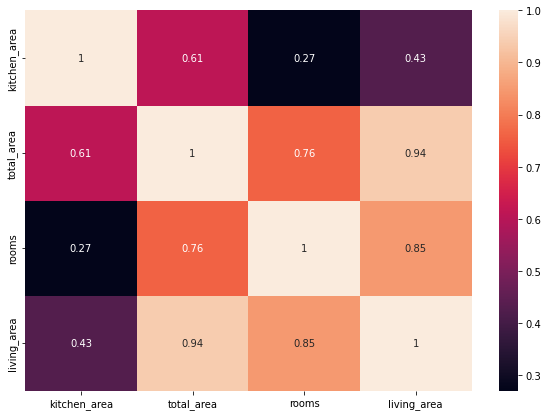

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_clean.loc[:, ['kitchen_area', 'total_area', 'rooms', 'living_area']].corr(), annot=True);

Площадь кухни и жилая площадь больше зависят от общей площади квартиры. Значит будем заполнять пропуски медианными значениями для нескольких категорий квартир, в зависимости от их общей площади. Добавим новый столбец ```total_area_round```, где укажем целое число квадратных метров для каждой квартиры.

In [20]:
data_clean['total_area_round'] = (data_clean['total_area'] // 1).convert_dtypes()
data_clean.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   balcony    locality_name  airports_nearest  city_centers_nearest  \
0        0  Санкт-Петербург           18863.0               16028.0   
1        2   посёлок Шушары           12817.0               18603.0   
2        0  Санкт-Петербург           21741.0               13933.0   
3        0  Санкт-Петербург           28098.0                6800.0   
4        0  Санкт-Петербург           31856.0                8098.0   

  parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                 1          482.0                  2          755.0   
1                 0            NaN                  0            NaN   
2                 1           90.0                  2          574.0   
3                 2           84.0                  3          234.0   
4                 2          112.0                  1           48.0   

   days_exposition  total_area_round  
0              NaN               108  
1             81.0                40  
2            558.0                56  
3            424.0               159  
4            121.0               100  

[5 rows x 23 columns]

Определим медианные значения площади кухни и жилой площади для каждого значения в столбце ```total_area_round```.

In [21]:
area_medians = data_clean.pivot_table(index='total_area_round', 
                                      values=['kitchen_area', 'living_area'], 
                                      aggfunc='median')

Запомним характеристики столбцов до заполнения пропусков.

In [22]:
areas_before = data_clean[['living_area', 'kitchen_area']].describe()

Теперь заполним пропуски в соответствии с размером квартиры.

In [23]:
for index in list(area_medians.index):
    data_clean.loc[((data_clean['total_area_round'] == index) & 
                   (data_clean['kitchen_area'].isna()), 'kitchen_area')
                  ] = area_medians.loc[index, 'kitchen_area']
    data_clean.loc[((data_clean['total_area_round'] == index) & 
                   (data_clean['living_area'].isna()), 'living_area')
                  ] = area_medians.loc[index, 'living_area']

Так как пропуски заполнялись медианным значением по группе квартир, то могли возникнуть противоречащие логике данные: общая площадь может оказаться меньше или равной сумме жилой площади и площади кухни, но так быть не может (в квартире еще есть санузлы, коридоры и другие помещения, к жилим не относящиеся, но включенные в общую площадь). Проверим есть ли такие строки.

In [24]:
data_clean[data_clean['total_area'] <= (data_clean['living_area']+data_clean['kitchen_area'])][['total_area', 
                                                                                                'kitchen_area', 
                                                                                                'living_area']]

total_area  kitchen_area  living_area
184         30.20          6.20        26.10
220         37.00          9.00        28.00
424         98.00         13.60        88.00
440         27.11          5.87        24.75
545         23.80          5.00        20.00
...           ...           ...          ...
22907      228.00         33.20       200.00
22963      102.00         24.00        78.00
23202       67.92         13.04        63.00
23297       48.20          6.00        42.20
23680       59.00          7.00        52.00

[217 rows x 3 columns]

Есть 217 таких строк. Они либо противоречили логике изначально, либо содержали пропуски в одном из столбцов ```living_area```, ```kitchen_area``` либо в обоих сразу. Можно удалить эти строки, так как их сравнительно немного и в них были пропуски, которые заполнить корректно с сохранением логики не получится.

In [25]:
data_clean = data_clean[data_clean['total_area'] > (data_clean['living_area'] + data_clean['kitchen_area'])]

In [26]:
print('    До заполнения пропусков\n\n', 
      areas_before,
      '\n\n\n    После заполнения пропусков   \n\n',
      data_clean[['living_area', 'kitchen_area']].describe())

    До заполнения пропусков

         living_area  kitchen_area
count  21743.000000  21382.000000
mean      34.462781     10.564128
std       22.037433      5.904316
min        2.000000      1.300000
25%       18.600000      7.000000
50%       30.000000      9.100000
75%       42.300000     12.000000
max      409.700000    112.000000 


    После заполнения пропусков   

         living_area  kitchen_area
count  23367.000000  23367.000000
mean      34.507945     10.408399
std       21.953643      5.714752
min        2.000000      1.300000
25%       18.600000      7.000000
50%       30.000000      9.000000
75%       42.200000     11.800000
max      409.700000    112.000000


После заполнения пропусков характеристики столбцов практически не поменялись.

Просуки в этих столбцах вероятно появились из-за того, что при публикации объявления эти поля оставили пустыми, заполнив только поле с информацией об общей площади квартиры.

Пропуски, которые можно обработать остались в столбце ```ceiling_height```. Поступим аналогично площади кухни. Заполним пропуски медианами рассчитанными для домов в зависимости от их этажности.

In [27]:
ceiling_height_medians = data_clean.pivot_table(index='floors_total', 
                                                values='ceiling_height', 
                                                aggfunc='median')

Запомним характеристики столбца с высотами потолков до заполнения пропусков.

In [28]:
ceiling_before = data_clean['ceiling_height'].describe()

Заполним пропуски медианными значениями.

In [29]:
for floor in list(ceiling_height_medians.index):
    data_clean.loc[(data_clean['floors_total'] == floor) & (data_clean['ceiling_height'].isna()), 
                   'ceiling_height'
                  ] = ceiling_height_medians.loc[floor, 'ceiling_height']

In [30]:
print('    До заполнения пропусков\n\n', 
      ceiling_before,
      '\n\n\n    После заполнения пропусков   \n\n',
      data_clean['ceiling_height'].describe())

    До заполнения пропусков

 count    14358.000000
mean         2.760639
std          0.928493
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64 


    После заполнения пропусков   

 count    23366.000000
mean         2.729042
std          0.738066
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64


Харакетристики ряда практически не изменились.

Выведем информацию обо всем датасете.

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23367 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23367 non-null  int64  
 1   last_price            23367 non-null  float64
 2   total_area            23367 non-null  float64
 3   first_day_exposition  23367 non-null  object 
 4   rooms                 23367 non-null  int64  
 5   ceiling_height        23366 non-null  float64
 6   floors_total          23367 non-null  float64
 7   living_area           23367 non-null  float64
 8   floor                 23367 non-null  int64  
 9   is_apartment          2732 non-null   object 
 10  studio                23367 non-null  bool   
 11  open_plan             23367 non-null  bool   
 12  kitchen_area          23367 non-null  float64
 13  balcony               23367 non-null  Int64  
 14  locality_name         23367 non-null  object 
 15  airports_nearest   

В столбце ```ceiling_height``` остался один пропуск. Посмотрим, что это за строчка.

In [32]:
data_clean.loc[data_clean['ceiling_height'].isna()]

total_images  last_price  total_area first_day_exposition  rooms  \
11575             9   9900000.0       101.0  2016-04-28T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
11575             NaN          33.0         53.0     32        False  ...   

       balcony    locality_name  airports_nearest  city_centers_nearest  \
11575        0  Санкт-Петербург           18732.0               20444.0   

      parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
11575                 0            NaN                  3           80.0   

       days_exposition  total_area_round  
11575             53.0               101  

[1 rows x 23 columns]

Единственная запись с 33-этажным домом. Для нее нет медианы, поэтому пропуск не был заполнен. Сам факт 33-этажного жилого дома тоже сомнителен. Можно удалить эту строку.

In [33]:
data_clean = data_clean.loc[data_clean['floors_total'] != 33]

Пропуски в столбце с высотой потолков тоже могли возникнуть из-за того, что этот параметр не был указан при публикации объвления.

Пропуски в столбцах ```parks_nearest```, ```ponds_nearest``` с расстоянием до ближайшего парка и пруда вероятно связаны с отсутсвием парков и прудов в радиусе 3 км. Проверим эту гипотезу.

In [34]:
#проверяем какие значения есть в столбце с числом парков для строк с пропусками в столбце с 
#расстоянием до ближайшего парка
print(data_clean[data_clean['parks_nearest'].isna()]['parks_around_3000'].unique())

#проверяем какие значения есть в столбце с числом прудов для строк с пропусками в столбце с 
#расстоянием до ближайшего пруда
print(data_clean[data_clean['ponds_nearest'].isna()]['ponds_around_3000'].unique())

#проверяем какие значения есть в столбце с числом парков для строк без пропусков в столбце с 
#расстоянием до ближайшего парка
print(data_clean[data_clean['parks_nearest'].notna()]['parks_around_3000'].unique())

#проверяем какие значения есть в столбце с числом прудов для строк без пропусков в столбце с 
#расстоянием до ближайшего пруда
print(data_clean[data_clean['ponds_nearest'].notna()]['ponds_around_3000'].unique())

<IntegerArray>
[0]
Length: 1, dtype: Int64
<IntegerArray>
[0]
Length: 1, dtype: Int64
<IntegerArray>
[1, 2, 3, 0]
Length: 4, dtype: Int64
<IntegerArray>
[2, 3, 1]
Length: 3, dtype: Int64


В датасете имеются строки, где число парков в радиусе 3 км равно нулю, но при этом указано расстояние до ближайшего парка. Посмотрим на эти строки:

In [35]:
data_clean[(data_clean['parks_around_3000'] == 0) & (data_clean['parks_nearest'].notna())][['locality_name', 'parks_around_3000', 'parks_nearest']]

locality_name  parks_around_3000  parks_nearest
1590   Санкт-Петербург                  0         3064.0
10959  Санкт-Петербург                  0         3190.0
19208  Санкт-Петербург                  0         3013.0
19430  Санкт-Петербург                  0         3190.0

Похоже гипотеза верна. Для квартир без парков и прудов расстояние до ближайшего пруда и парка либо не указано, либо превышает 3 км. Точных значений для заполнения пропусков узнать не получится, удалять не лучший вариант (очень много строк теряется), заполнение медианой или средним нарушит логику. Поэтому пока оставим пропуски в этих столбцах на месте.

Похоже эти пропуски связаны с ошибкой при сборе данных, видимо данные могут вноситься, даже если пруда или парка нет в радиусе 3 км, но этого не происходит в подавляющем большинстве случаев.

Заполним пропуски в столбце ```city_centers_nearest``` медианными значениями по населенным пунктам

In [36]:
for locality_name in data_clean['locality_name'].unique():
    median = data_clean.loc[data_clean['locality_name'] == locality_name, 'city_centers_nearest'].median()
    data_clean.loc[((data_clean['city_centers_nearest'].isna()) & (data_clean['locality_name'] == locality_name)), 
                   'city_centers_nearest'
                  ] = median

В столбце ```days_exposition``` имеются пропуски. Возможно данных нет, так как объявление не было снято на момент формирования архива, а соответственно посчитать число дней между публикацией и снятием объявления невозможно. Пока оставим эти пропуски.

Пропуски в столбе ```airports_nearest``` заполнить тоже не получится: медиана не поменяет характеристик всего столбца, но может повлиять на другие закономерности. Эти пропуски тоже могли возникнуть из-за ошибки при формировании картографических данных.

На этом работу с пропусками можно завершить.

## Работа с типами данных

Посмотрим еще раз на первые 5 строк датасета и на общую информацию.

In [37]:
display(data_clean.head())
display(data_clean.info())

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1            2.75          11.0         18.6      1          NaN  ...   
2            2.55           5.0         34.3      4          NaN  ...   
3            2.60          14.0         99.0      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   balcony    locality_name  airports_nearest  city_centers_nearest  \
0        0  Санкт-Петербург           18863.0               16028.0   
1        2   посёлок Шушары           12817.0               18603.0   
2        0  Санкт-Петербург           21741.0               13933.0   
3        0  Санкт-Петербург           28098.0                6800.0   
4        0  Санкт-Петербург           31856.0                8098.0   

  parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                 1          482.0                  2          755.0   
1                 0            NaN                  0            NaN   
2                 1           90.0                  2          574.0   
3                 2           84.0                  3          234.0   
4                 2          112.0                  1           48.0   

   days_exposition  total_area_round  
0              NaN               108  
1             81.0                40  
2            558.0                56  
3            424.0               159  
4            121.0               100  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23366 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23366 non-null  int64  
 1   last_price            23366 non-null  float64
 2   total_area            23366 non-null  float64
 3   first_day_exposition  23366 non-null  object 
 4   rooms                 23366 non-null  int64  
 5   ceiling_height        23366 non-null  float64
 6   floors_total          23366 non-null  float64
 7   living_area           23366 non-null  float64
 8   floor                 23366 non-null  int64  
 9   is_apartment          2731 non-null   object 
 10  studio                23366 non-null  bool   
 11  open_plan             23366 non-null  bool   
 12  kitchen_area          23366 non-null  float64
 13  balcony               23366 non-null  Int64  
 14  locality_name         23366 non-null  object 
 15  airports_nearest   

None

В столбце ```first_day_exposition``` с указанием даты публикации объявления тип данных - *object*. Заменим тип данных в данном столбце на *datetime*.

In [38]:
data_clean['first_day_exposition'] = pd.to_datetime(data_clean['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S') #заменяем тип дат со строками на тип datetime

Следующим интересующим нас столбцом является столбец ```floors_total```. В нем указано общее число этажей в доме, где продается квартира, очевидно что только целое число может отражать количество этажей, поэтому заменим тип данных в этом столбце с *float* на *int*.

In [39]:
data_clean['floors_total'] = data_clean['floors_total'].astype(np.dtype(np.int64))

Столбец с ценами ```last_price``` тоже интересен. Значения в нем имеют формат float, но вряд ли кто-то продает квартиру указывая число копеек. Исправим это

In [40]:
data_clean['last_price'] = data_clean['last_price'].astype(np.dtype(np.int64))

In [41]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23366 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23366 non-null  int64         
 1   last_price            23366 non-null  int64         
 2   total_area            23366 non-null  float64       
 3   first_day_exposition  23366 non-null  datetime64[ns]
 4   rooms                 23366 non-null  int64         
 5   ceiling_height        23366 non-null  float64       
 6   floors_total          23366 non-null  int64         
 7   living_area           23366 non-null  float64       
 8   floor                 23366 non-null  int64         
 9   is_apartment          2731 non-null   object        
 10  studio                23366 non-null  bool          
 11  open_plan             23366 non-null  bool          
 12  kitchen_area          23366 non-null  float64       
 13  balcony         

Теперь все типы данных соответствуют содержанию столбцов. Просмотрим информацию о таблице.

In [42]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23366 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23366 non-null  int64         
 1   last_price            23366 non-null  int64         
 2   total_area            23366 non-null  float64       
 3   first_day_exposition  23366 non-null  datetime64[ns]
 4   rooms                 23366 non-null  int64         
 5   ceiling_height        23366 non-null  float64       
 6   floors_total          23366 non-null  int64         
 7   living_area           23366 non-null  float64       
 8   floor                 23366 non-null  int64         
 9   is_apartment          2731 non-null   object        
 10  studio                23366 non-null  bool          
 11  open_plan             23366 non-null  bool          
 12  kitchen_area          23366 non-null  float64       
 13  balcony         

## Работа с дубликатами

Интересует столбец с названиями населенных пунктов. Чтобы избежать наличия разных названий для одного населенного пункта выведем все уникальные значения столбца ```locality_name```.

Определим число уникальных значений в столбце ```locality_name``` и выведем отсортированные уникальные значения этого столбца.

In [43]:
pd.options.display.max_rows = 999 #установим параметр для вывода в 999 строк, чтобы видеть весь вывод без пропусков.
print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))
data_clean['locality_name'].sort_values().unique()

Число уникальных значений в столбце с названиями населенных пунктов: 365


array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Есть 365 уникальных значения, среди них можно заметить дубликаты, например ```'поселок Перово'``` и ```'посёлок Перово'```. Разница в одной букве, значит заменив ```'ё'``` на ```'е'``` во всем столбце мы избавимся от всех аналогичных дубликатов.



In [44]:
data_clean['locality_name'] = data_clean['locality_name'].str.replace('ё', 'е')
print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))

Число уникальных значений в столбце с названиями населенных пунктов: 331


Число уникальных значений уменьшилось, но это еще не все. Например есть ```'городской поселок Большая Ижора'``` и ```'поселок городского типа Большая Ижора'``` или ```'поселок городского типа Рябово'``` и ```'поселок Рябово'```.
Удобно такие населенные пункты назвать - ```'поселок'```.

In [45]:
data_clean['locality_name'] = data_clean['locality_name'].str.replace('поселок городского типа', 'поселок')
data_clean['locality_name'] = data_clean['locality_name'].str.replace('городской поселок', 'поселок')
print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))

Число уникальных значений в столбце с названиями населенных пунктов: 323


Ушли еще некоторые неявные дубликаты.
Остались еще поселки с привязкой к жд станциям. Назовем все такие поселки ```'поселок станции'```.

In [46]:
data_clean['locality_name'] = data_clean['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')

print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))

Число уникальных значений в столбце с названиями населенных пунктов: 321


Остались населенные пункты, которые раньше имели статус деревни или поселка, но теперь это города. Актуализируем их названия.

In [47]:
data_clean['locality_name'] = data_clean['locality_name'].replace('деревня Кудрово', 'Кудрово')
data_clean['locality_name'] = data_clean['locality_name'].replace('поселок Мурино', 'Мурино')

print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))

Число уникальных значений в столбце с названиями населенных пунктов: 319


Таким образом от 365 наименований осталось 319. Выведем снова отсортированный список уникальных значений.

In [48]:
pd.options.display.max_rows = 370
print('Число уникальных значений в столбце с названиями населенных пунктов:', len(data_clean['locality_name'].unique()))
list(data_clean['locality_name'].sort_values().unique())

Число уникальных значений в столбце с названиями населенных пунктов: 319


['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня

Похоже все неявные дубликаты обработаны. Можно проверить наличие явных дубликатов в датасете, и если все в порядке, то можно перейти к работе с подозрительными значениями.

In [49]:
data_clean.duplicated().sum()

0

Все строки датасета отличаются друг от друга.

In [50]:
pd.options.display.max_rows = 30 #установим параметр для вывода в 30 строк.

## Редкие и необычные значения

Изучим получившийся датасет.

In [51]:
data_clean.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23366.000000  2.336600e+04  23366.000000  23366.000000    23366.000000   
mean       9.878884  6.497449e+06     60.269058      2.075366        2.729042   
std        5.677243  1.064469e+07     34.771944      1.073986        0.738066   
min        0.000000  1.219000e+04     14.000000      0.000000        1.000000   
25%        6.000000  3.450000e+06     40.000000      1.000000        2.550000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.790000e+06     69.900000      3.000000        2.750000   
max       50.000000  7.630000e+08    900.000000     19.000000       32.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23366.000000  23366.000000  23366.000000  23366.000000  23366.000000   
mean      10.660318     34.507153      5.871780     10.407946      0.591415   
std        6.583078     21.953780      4.864885      5.714454      0.959042   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.200000      8.000000     11.800000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17912.000000          18012.000000       23366.000000   
mean       28808.200536          14210.081890           0.468715   
std        12636.299454           8620.988909           0.747995   
min            0.000000            181.000000           0.000000   
25%        18575.750000           9265.000000           0.000000   
50%        26757.500000          13073.000000           0.000000   
75%        37273.000000          16293.000000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
count    7967.000000       23366.000000    8975.000000     20221.000000   
mean      490.602234           0.590174     518.086462       181.321646   
std       340.578792           0.883389     277.741350       219.961449   
min         1.000000           0.000000      13.000000         1.000000   
25%       288.000000           0.000000     293.000000        45.000000   
50%       455.000000           0.000000     503.000000        96.000000   
75%       612.000000           1.000000     730.000000       232.000000   
max      3190.000000           3.000000    1344.000000      1580.000000   

       total_area_round  
count      23366.000000  
mean          60.041043  
std           34.783739  
min           14.000000  
25%           40.000000  
50%           52.000000  
75%           69.000000  
max          900.000000

Стандартные отклонения либо **превышают** средние арифметические (разброс в значениях очень серьезный), либо в лучшем случае составляет **50%** от среднего.

### ```last_price```

Первым изучим столбец где стандартное отклонение отличается от среднего на порядок. Это столбец ```last_price```.

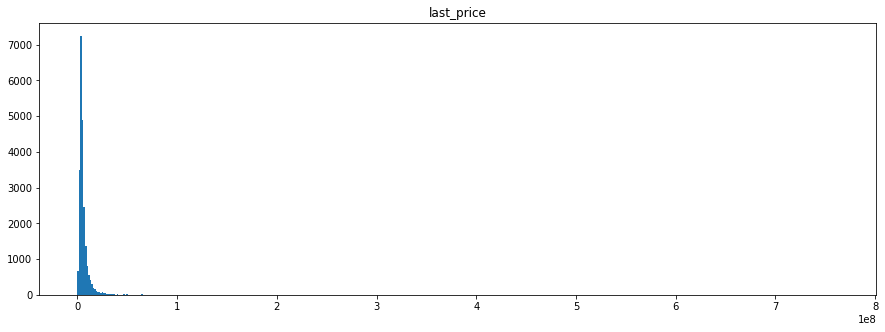

In [52]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['last_price'], bins=500, label='last_price')
plt.title('last_price');

Большинство значений собрано до 20 миллионов - это вполне ожидаемая картина для цен на квартиры. Но есть крайне выбивающиеся значения в 100, 300, и даже 700 миллионов - это либо ошибка, либо просто очень редкое явление.

Построим диаграмму размаха для этого столбца.

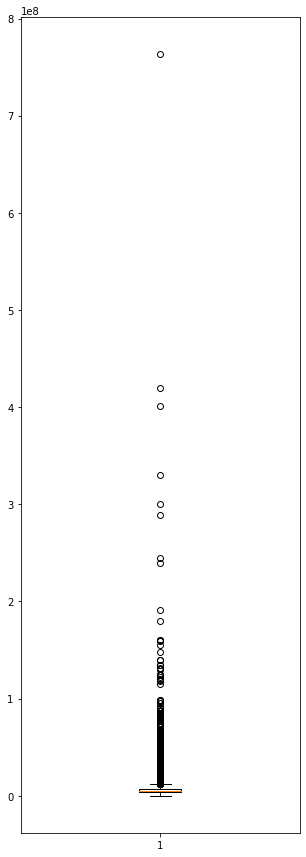

In [53]:
plt.figure(figsize=(5, 15))
plt.boxplot(data_clean['last_price'])

plt.show()

Судя по диаграмме размаха нормальные значения лежат до 10 миллионов, остальное - это выбросы. Посчитаем их количество.

In [54]:
print(f'{len(data_clean.query("last_price > 10000000"))/len(data_clean) : .2%}')

 11.41%


Более 11 процентов объявлений попадают в число выбросов. Это довольно много.

Посмторим на объявления стоимсотью более 25 млн рублей, возможно стоимость указана в копейках. Если площади квартир и расположение не будут соответствовать высоким ценам, то возможно цена указана в копейках.

In [55]:
# В каких населенных пунктах расположены эти дорогие квартиры
print(data_clean[data_clean['last_price'] >= 25000000]
      ['locality_name']
      .unique())

# Какая минимальная и максимальная площадь у таких квартир
print(data_clean[data_clean['last_price'] >= 25000000]
      ['total_area']
      .apply(['min', 'max']))

['Санкт-Петербург' 'Пушкин' 'поселок Репино' 'Колпино']
min     33.0
max    900.0
Name: total_area, dtype: float64


Выглядит все почти логично, очень дорогие квартиры - это квартиры с большой площадью, расположенные в Санкт-Петербурге. 
Какой процент датасета занимают такие квартиры. Конечно минимальная площадь равна 33 метрам, но можно себе предстваить новую квартиру в элитном доме - маленькую - но дорогую.

In [56]:
len(data_clean.query('last_price >= 25000000'))/len(data_clean)

0.02020029102114183

Всего 2% составляют такие дорогие квартиры, такие редкие случаи можно удалить.

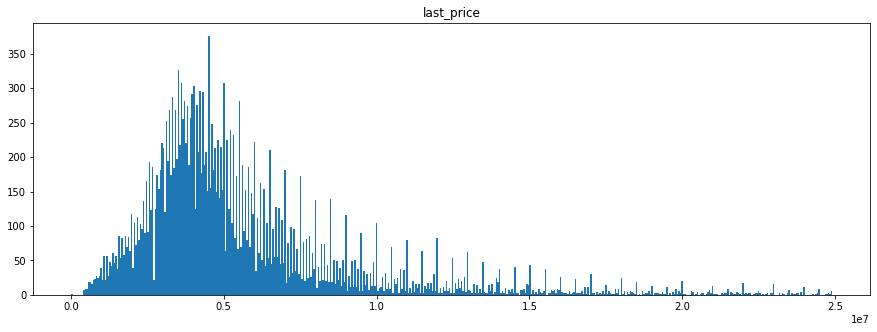

In [57]:
data_clean = data_clean.query('last_price < 25000000')
plt.figure(figsize=(15, 5))
plt.hist(data_clean['last_price'], bins=500, label='last_price')
plt.title('last_price');

### ```total_area```

Изучим столбец с данными об общей площади квартир ```total_area```.

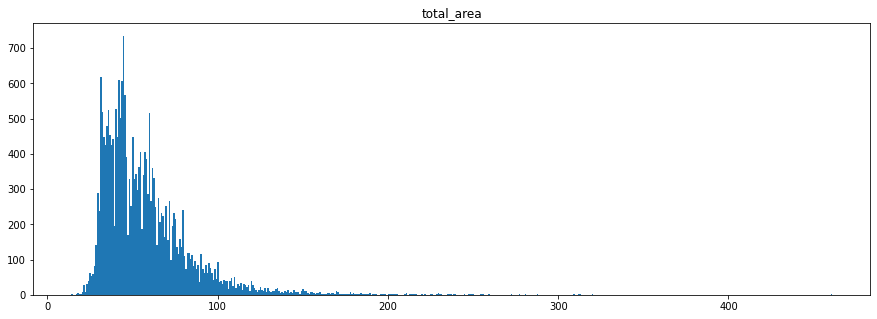

In [58]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['total_area'], bins=500, label='total_area')
plt.title('total_area');

По гистограмме видно, что совсем мало квартир размером более 200 кв.м. Посчитаем процент таких квартир.

In [59]:
print(f'{len(data_clean[data_clean["total_area"] > 200])/len(data_clean) : .2%}')

 0.27%


Менее 1% квартир с такими большими площадями, их можно удалить, это слишком редкие случаи.

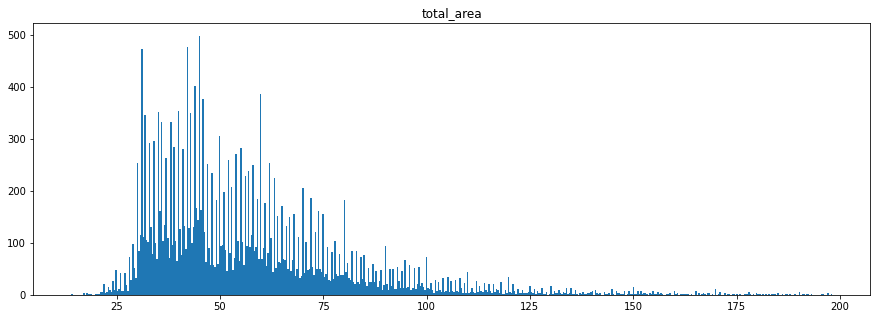

In [60]:
data_clean = data_clean.query('total_area < 200')

plt.figure(figsize=(15, 5))
plt.hist(data_clean['total_area'], bins=500, label='total_area')
plt.title('total_area');

### ```rooms```

В столбце с числом комнат тоже есть необычные значения, изучим гистаграмму.

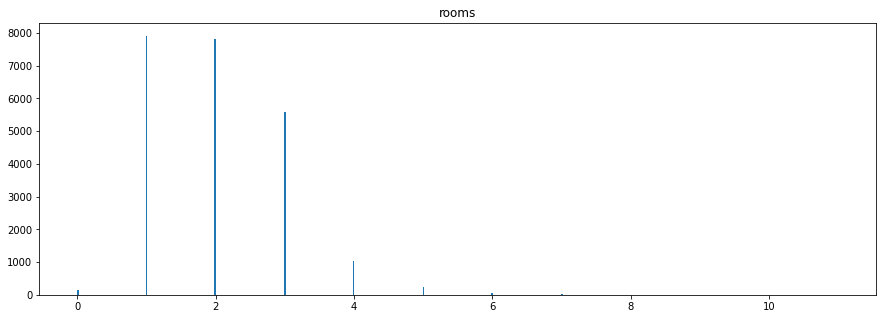

In [61]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['rooms'], bins=500, label='rooms')
plt.title('rooms');

Квартиры, в которых 6 и более комнат очень редки. Посчитаем процент таких квартир.

In [62]:
print(f'{len(data_clean.query("rooms >= 6"))/len(data_clean) : .2%}')

 0.32%


Настолько редкие, что их менее половины процента среди всех квартир. Можно такие необычные квартиры удалить.

In [63]:
data_clean = data_clean.query('rooms < 6')

Касательно квартир с нулем комнат, возможно так обозначают число комнат в студиях, проверм.

In [64]:
print('Число студий', data_clean['studio'].sum())

Число студий 117


In [65]:
print(f'Число студий c 0 комнат: {len(data_clean.query("studio == True and rooms == 0"))}')

Число студий c 0 комнат: 108


Практически для всех студий указано нулевое число комнат. Значит отбрасывать такие квартиры не нужно, иначе мы просто потеряем практически все студии.

### Изучим ```ceiling_height```

Изучим данные о высотах потолков из столбца ```ceiling_height```.

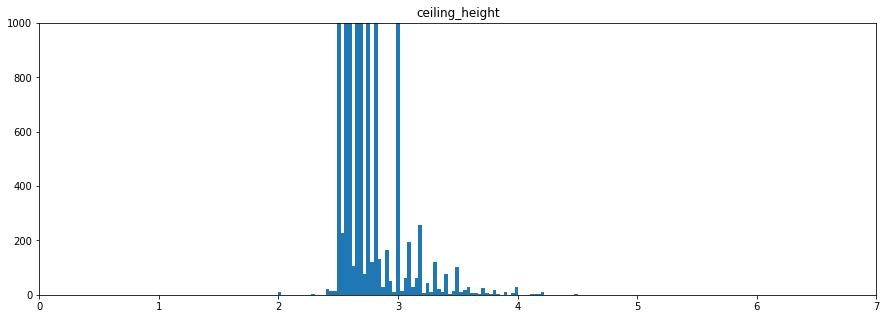

In [66]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['ceiling_height'], bins=1000, label='ceiling_height')
plt.xlim(0, 7)
plt.ylim(0, 1000)
plt.title('ceiling_height');

Основная масса квартир имеют потолки высотой до 3.5 метров. Такие высокие потолки могут быть в старых дореволюционных зданиях и логично, что их не очень много. Но можно заметить, что есть потолки менее двух метров, что маловероятно. Квартиры с подозрительно низкими потолками можно удалить - их единицы.

In [67]:
data_clean = data_clean.query('ceiling_height > 2')

Теперь изучим квартиры с подозрительно высокими потолками. Их можно условно разделить на две группы - одни можно интерпретировать как ошибку, например если высота потолка 26 метров, вероятно это ошибка и имелась в виду высота 2.6 метра. А второй тип так интерпретировать не получится. Потолок высотой 10 метров вряд ли реален, но и потолка в 1 метр тоже не встретить. Поэтому очень высокие потолки можно разделить на 10 и получить потолки ожидаемой высоты, а остальные просто удалить из датасета.

In [68]:
print(f'Потолков высотой от 3.5 до 20 метров: {len(data_clean.query("3.5 < ceiling_height < 20"))/len(data_clean) : .2%}')
print(f'Потолков высотой более 20 метров: {len(data_clean.query("ceiling_height >= 20"))/len(data_clean) : .2%}')

Потолков высотой от 3.5 до 20 метров:  0.90%
Потолков высотой более 20 метров:  0.09%


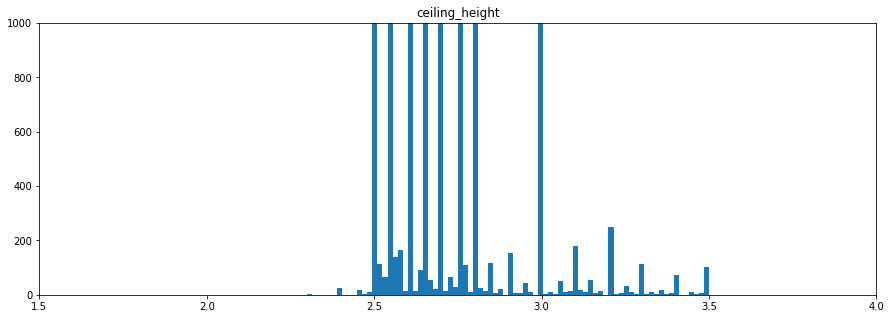

In [69]:
data_clean = data_clean.query('ceiling_height >= 20 or ceiling_height <= 3.5')
data_clean.loc[data_clean['ceiling_height'] >= 20, 'ceiling_height'] = data_clean.loc[data_clean['ceiling_height'] >= 20, 'ceiling_height'] / 10

plt.figure(figsize=(15, 5))
plt.hist(data_clean['ceiling_height'], bins=100, label='ceiling_height')
plt.xlim(1.5, 4)
plt.ylim(0, 1000)
plt.title('ceiling_height');

Заметно, что есть несколько наиболее встречающихся значений, которые были менее заметны на гистограмме исходного датасета. Они появились в результате заполнения пропусков медианными значениями по домам разной этажности. Пропусков в исходном столбце ```ceiling_height``` было практически 40%.

В типовых домах стандартная высота потолков, поэтому такая картина вполне правдоподобна.

### Изучим ```floors_total```

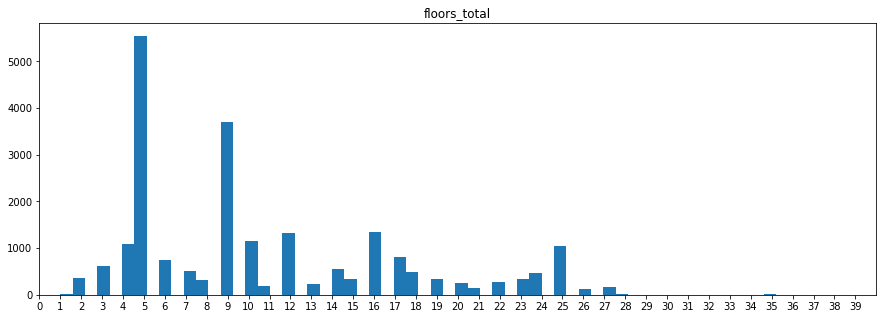

In [70]:
x_ticks = list(range(0, 40))
plt.figure(figsize=(15, 5))
plt.hist(data_clean['floors_total'], bins=100, label='floors_total')
plt.xticks(ticks=x_ticks)
plt.xlim(0, 40)
plt.title('floors_total');

Явно выделяются несколько типов домов 5-, 9-, 10-, 12-, 16-, 25-этажки, самые популярные типовые решения в нашей стране. Но имеются значения, которые в стандартную картину не вписываются - жилые дома с этажностью выше 26 этажей выглядят подозрительно. Их совсем немного, можно просто избавиться от таких подозрительных значений.

Так же можно заметить, что в датасете всего 24 одноэтажных дома. Это действительно могут быть одноэтажки где-то в пригороде, но также это может быть ошибка и просто в поле с общим числом этажей вносили этаж, на котором находится квартира. Лучше избавиться от этих строк, так как их совсем немного.

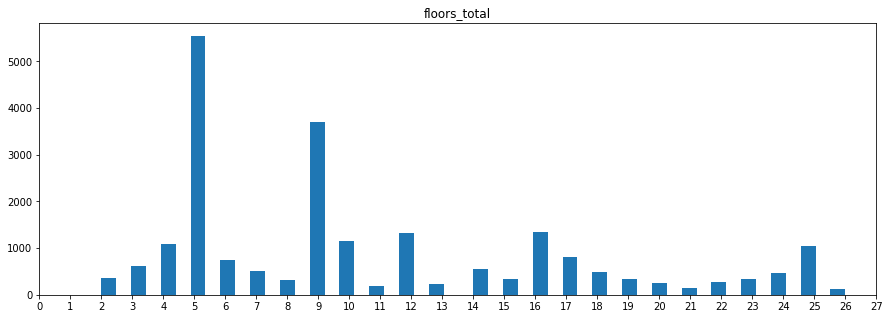

In [71]:
data_clean = data_clean.query('floors_total <= 26')
data_clean = data_clean.query('floors_total > 1')

x_ticks = list(range(0, 40))
plt.figure(figsize=(15, 5))
plt.hist(data_clean['floors_total'], bins=50, label='floors_total')
plt.xticks(ticks=x_ticks)
plt.xlim(0, 27)
plt.title('floors_total');

### Изучим ```living_area``` и ```kitchen_area```

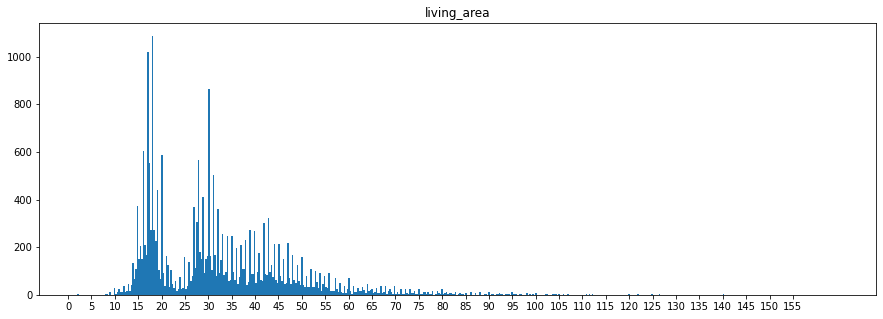

In [72]:
x_ticks = list(range(0, 160, 5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['living_area'], bins=500, label='living_area')
plt.xticks(ticks=x_ticks)
plt.title('living_area');

На гистограмме явно выделяются 3 группы значений:
* 10-23 кв.м
* 23-35 кв.м 
* 36-50 кв.м

Квартиры с жилой площадью более 80 кв.м практически не встречаются, как и квартиры с жилой площадью менее 10 кв.м, от них можно избавиться.

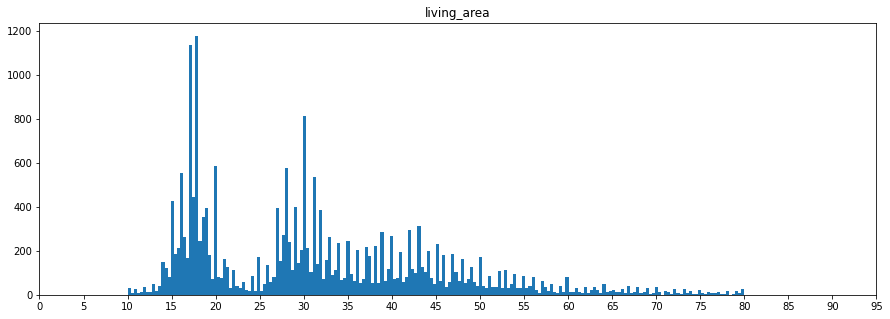

In [73]:
data_clean = data_clean.query('10 <= living_area <= 80')
x_ticks = list(range(0, 100, 5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['living_area'], bins=200, label='living_area')
plt.xticks(ticks=x_ticks)
plt.title('living_area');

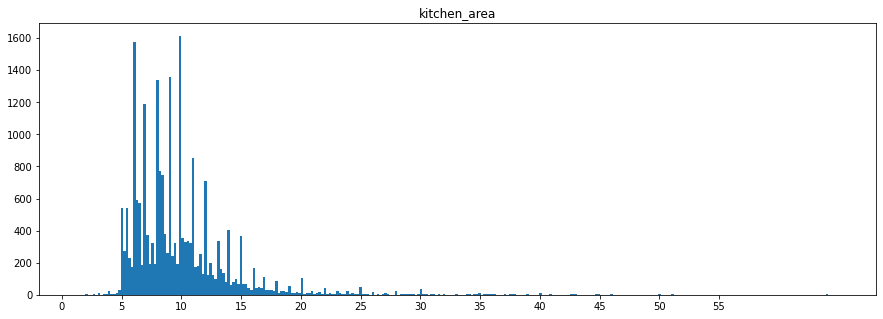

In [74]:
x_ticks = list(range(0, 60, 5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['kitchen_area'], bins=300, label='kitchen_area')
plt.xticks(ticks=x_ticks)
plt.title('kitchen_area');

Площади кухонь уже не имеют такого явного разделения на несколько групп.

Причем квартир с кухнями менее 5 кв.м практически нет. Можно отбросить такие значения.

In [75]:
data_clean = data_clean.query('kitchen_area >=5')

Квартир с кухнями более 20 кв.м тоже не очень много, посчитаем их процент.

In [76]:
print(f'{len(data_clean.query("kitchen_area > 20"))/len(data_clean) : .2%}')

 2.75%


Это достаточно редкие значения, отбросим их.

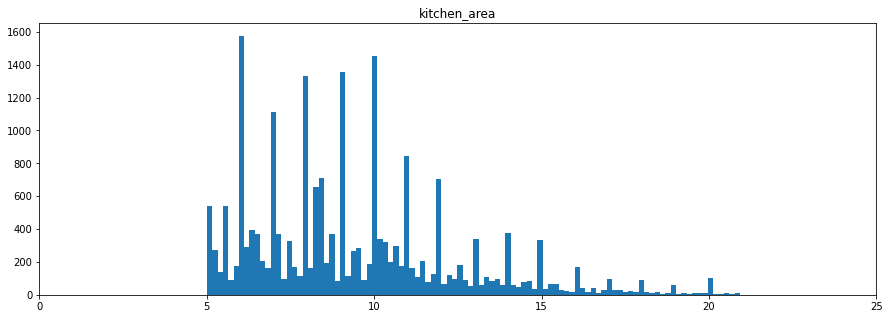

In [77]:
data_clean = data_clean.query('kitchen_area < 21')
x_ticks = list(range(0, 30, 5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['kitchen_area'], bins=100, label='kitchen_area')
plt.xticks(ticks=x_ticks)
plt.title('kitchen_area');

### Изучим ```floor```

Изучим информацию об этажах, на которых расположены квартиры.

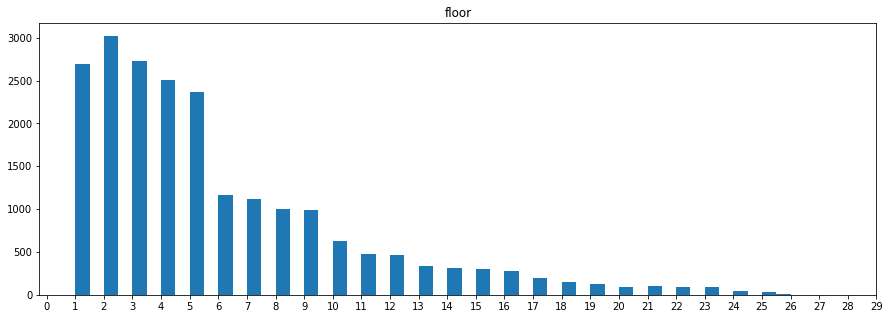

In [78]:
x_ticks = list(range(0, 30, 1))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['floor'], bins=50, label='floor')
plt.xticks(ticks=x_ticks)
plt.title('floor');

Все логично, чем выше этаж, тем меньше таких квартир встречается.

### Изучим ```balcony```

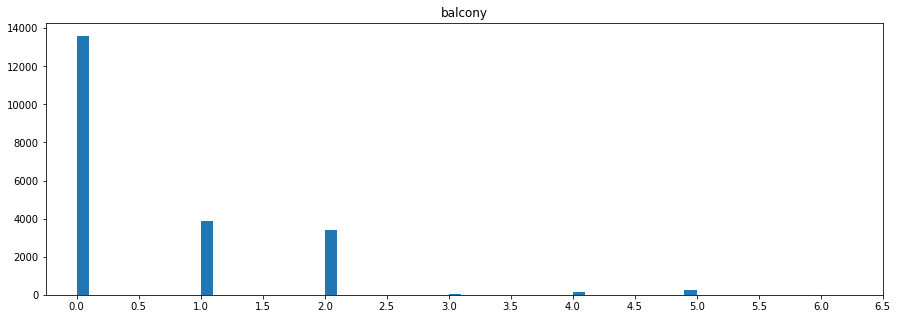

In [79]:
x_ticks = list(np.arange(0, 7, 0.5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['balcony'], bins=50, label='balcony')
plt.xticks(ticks=x_ticks)
plt.title('balcony');

Первая часть гистограммы выглядит логично, обычно в квартирах не более 2-х балконов. Но почему квартир с 4 и 5 балконами заметно больше, чем квартир с 3 балконами. Посмотрим на квартиры с 3, 4, и 5 балконами.

In [80]:
#число комнат в квартирах с 3 балконами
data_clean.query('balcony == 3 ')['rooms'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

In [81]:
#число комнат в квартирах с 4 балконами
data_clean.query('balcony == 4 ')['rooms'].unique()

array([2, 1, 3, 4], dtype=int64)

In [82]:
#число комнат в квартирах с 5 балконами
data_clean.query('balcony == 5 ')['rooms'].unique()

array([3, 2, 4, 1], dtype=int64)

Получились подозрительные результаты, 3, 4 и даже 5 балконов встречаются даже в 1-комнатных квартирах - логика говорит, что таких квартир в принципе быть не может. Можно предположить, что в лучшем случае в квартире может быть на один балкон больше чем комнат: по балкону в каждой комнате и один на кухне, тогда нужно отбросить разного рода аномалии типа 4 балконов в однушке или двушке.

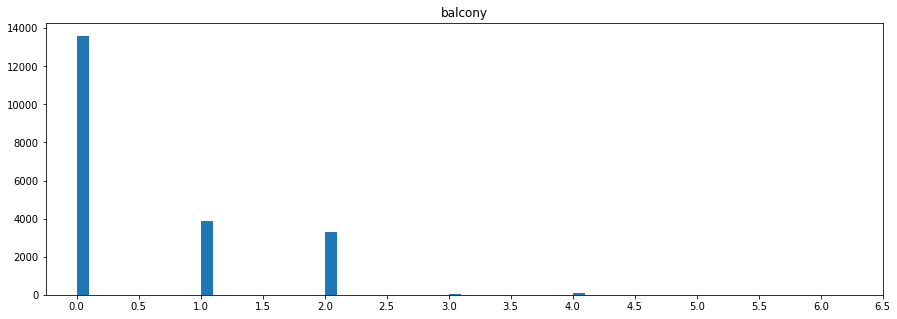

In [83]:
data_clean = data_clean.loc[data_clean['balcony'] <= (data_clean['rooms'] + 1)]

x_ticks = list(np.arange(0, 7, 0.5))

plt.figure(figsize=(15, 5))
plt.hist(data_clean['balcony'], bins=50, label='balcony')
plt.xticks(ticks=x_ticks)
plt.title('balcony');

### Изучим ```parks_nearest``` и ```ponds_nearest```

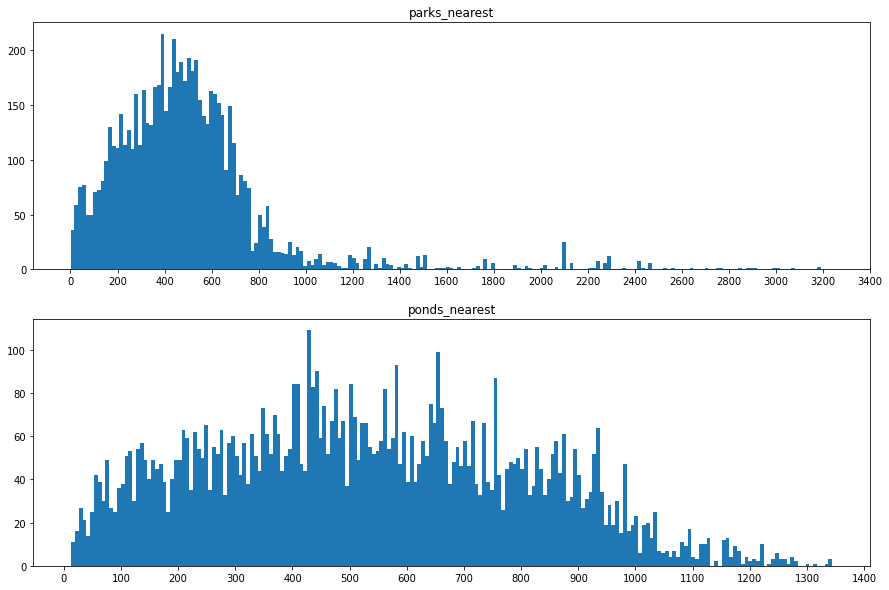

In [84]:
figure, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))

ax1.hist(data_clean['parks_nearest'], bins=200, label='parks_nearest')
ax1.set_xticks(ticks=list(range(0, 3500, 200)))
ax1.set_title('parks_nearest')
ax2.hist(data_clean['ponds_nearest'], bins=200, label='ponds_nearest')
ax2.set_xticks(ticks=list(range(0, 1500, 100)))
ax2.set_title('ponds_nearest')

plt.show()

Гистограмма для водоемов (```ponds_nearest```) отличается от гистограммы по паркам (```parks_nearest```). Это можно объяснить тем, что водоемы вероятно расположены более плотно, чем парки.

Также заметен странный всплеск на гистограмме для парков в районе 2100 м. Изучим эти строки.

In [85]:
data_clean.query('(2090 < parks_nearest < 2110)')

total_images  last_price  total_area first_day_exposition  rooms  \
512               8     6260000       43.30           2014-12-09      1   
684               5     9200000       82.93           2014-12-09      2   
3837              5     7257317       49.81           2017-02-03      1   
4075             20    23411700      149.50           2017-04-06      4   
5463              1     6868120       51.64           2016-05-06      1   
5996              9     6150000       41.00           2018-03-07      1   
6726              6    11995000       83.82           2014-11-27      2   
8094              4    11757590       77.40           2019-04-09      2   
9777              4     8577905       51.70           2019-05-01      2   
11449             4     6800000       46.00           2017-05-16      1   
12394             5     6200000       43.00           2014-12-09      1   
13672            12    16300000       74.60           2018-10-10      2   
16159             5    14538350       80.55           2014-11-27      2   
16419            13    11750000       95.80           2017-10-24      3   
17879             3    12480750       82.00           2016-06-07      2   
18365             4     5300000       48.03           2015-11-06      1   
19391            20    15525000       75.00           2018-02-17      2   
19684            19     6500000       40.00           2018-06-19      1   
20401             4     5500000       44.10           2015-11-06      1   
21412            12     8300000       61.00           2017-11-21      2   
21561            20    14343480       93.20           2018-02-17      2   
21577            10     5350000       39.40           2017-09-13      1   
21903            18    17753472       93.40           2018-01-01      3   
22806            12     7750000       42.30           2018-06-29      1   
23404             3    17671500       90.00           2017-02-03      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
512              2.80             8        25.00      5          NaN  ...   
684              2.65            12        41.92      6          NaN  ...   
3837             2.80            10        21.65     10        False  ...   
4075             2.70            12        74.16      8        False  ...   
5463             2.65            12        18.95      4          NaN  ...   
5996             2.60            10        17.50      7          NaN  ...   
6726             2.73            11        42.31      1          NaN  ...   
8094             2.75             8        15.20      1          NaN  ...   
9777             2.75             8        13.70      1          NaN  ...   
11449            2.65            12        17.00     11          NaN  ...   
12394            2.65            12        19.00      4        False  ...   
13672            2.80            12        38.20     11          NaN  ...   
16159            2.80            12        35.00     10        False  ...   
16419            2.65            12        51.30      3          NaN  ...   
17879            2.70            12        34.63      8          NaN  ...   
18365            2.60            10        20.03      1          NaN  ...   
19391            3.00            13        35.92      7        False  ...   
19684            2.65            12        14.30      1          NaN  ...   
20401            2.60            10        16.60      1          NaN  ...   
21412            2.65            12        27.40      9          NaN  ...   
21561            3.00            13        41.17      2        False  ...   
21577            2.65            12        15.00      4          NaN  ...   
21903            3.00             7        51.70      6        False  ...   
22806            2.65            12        14.00     12          NaN  ...   
23404            2.80            12        35.00      9        False  ...   

       balcony    locality_name  airports_nearest  ci

Картографические данные говорят о том, что все эти квартиры находятся в одном доме. Но судя по ```floors_total``` это разные дома. Может быть это ошибка при сборе картографиеских данных, а может это все фейковые объявления. В любом случае это аномалия и от нее нужно избавиться.

In [86]:
data_clean = data_clean.query('parks_nearest != 2102')

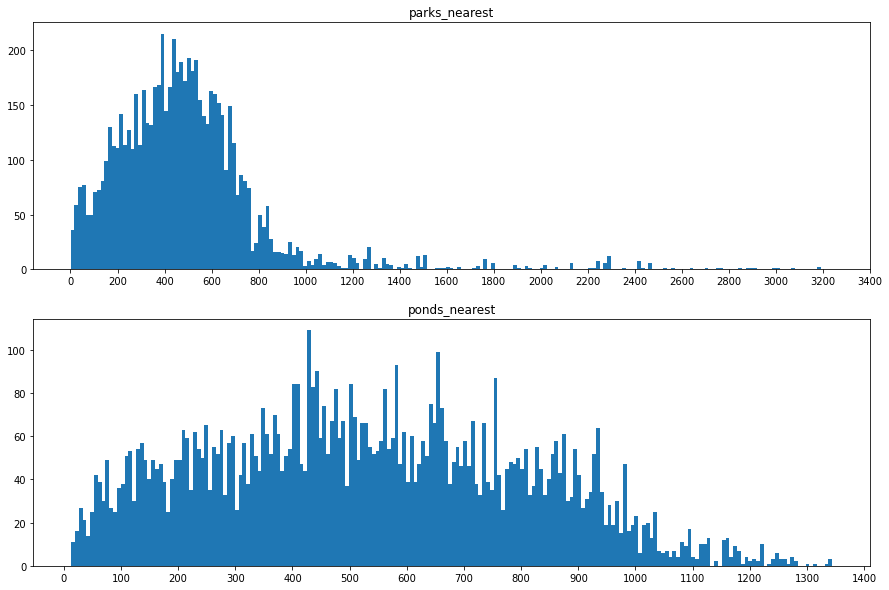

In [87]:
figure, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))

ax1.hist(data_clean['parks_nearest'], bins=200, label='parks_nearest')
ax1.set_xticks(ticks=list(range(0, 3500, 200)))
ax1.set_title('parks_nearest')
ax2.hist(data_clean['ponds_nearest'], bins=200, label='ponds_nearest')
ax2.set_xticks(ticks=list(range(0, 1500, 100)))
ax2.set_title('ponds_nearest')

plt.show()

### Изучим ```airports_nearest``` и ```city_centers_nearest```

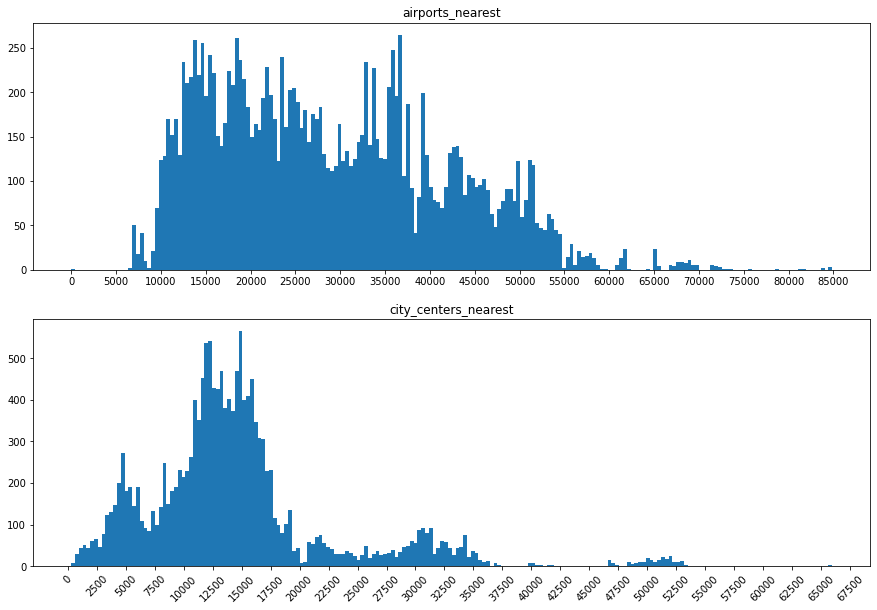

In [88]:
figure, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))

ax1.hist(data_clean['airports_nearest'], bins=200, label='airports_nearest')
ax1.set_xticks(ticks=list(range(0, 90000, 5000)))
ax1.set_title('airports_nearest')
ax2.hist(data_clean['city_centers_nearest'], bins=200, label='city_centers_nearest')
ax2.set_xticks(ticks=list(range(0, 70000, 2500)))
ax2.set_xticklabels(list(range(0, 70000, 2500)), rotation=45)
ax2.set_title('city_centers_nearest')

plt.show()

Видно, что квартиры, отдаленные от аэропорта более чем на 60 км уже достаточно редкое явление. Так же можно заметить что есть значение около 0, что странно - обычно квартир прямо у забора аэропорта не строят. Удалим все рпедкие и странные значения.

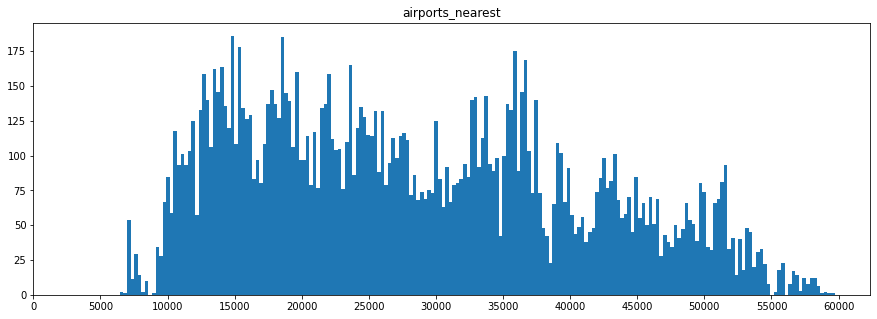

In [89]:
data_clean = data_clean.query('((airports_nearest <= 60000) and (airports_nearest > 5000)) or airports_nearest.isna()')

plt.figure(figsize=(15, 5))
plt.hist(data_clean['airports_nearest'], bins=200, label='airports_nearest')
plt.xticks(ticks=list(range(0, 65000, 5000)))
plt.title('airports_nearest')

plt.show()

Отбросим совсем редкие значения: квартиры на расстоянии более 36 км от центра. А оставшиеся данные разобьем на 4 группы: в пределах 7,5 км от центра - 1, от 7,5 до 20 км - 2, от 20 до 25 км - 3, и расположенные дальше 25 км от центра - 4.

In [90]:
data_clean = data_clean.query('(city_centers_nearest <= 36000) or (city_centers_nearest.isna())')
data_clean.loc[(data_clean['city_centers_nearest'] <= 7500), 'type_of_distance_from_centre'] = 1
data_clean.loc[((data_clean['city_centers_nearest'] <= 20000) & (data_clean['city_centers_nearest'] > 7500)), 'type_of_distance_from_centre'] = 2
data_clean.loc[((data_clean['city_centers_nearest'] <= 25000) & (data_clean['city_centers_nearest'] > 20000)), 'type_of_distance_from_centre'] = 3
data_clean.loc[(data_clean['city_centers_nearest'] > 25000), 'type_of_distance_from_centre'] = 4

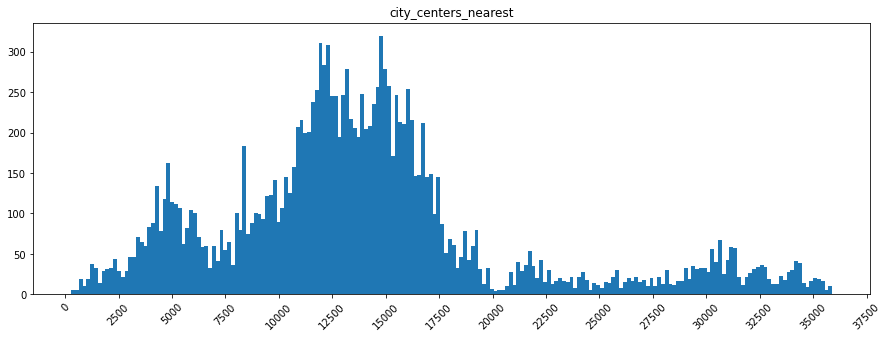

In [91]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['city_centers_nearest'], bins=200, label='city_centers_nearest')
plt.xticks(ticks=list(range(0, 40000, 2500)), rotation=45)
plt.title('city_centers_nearest')

plt.show()

### Изучим ```days_exposition```

Рассмотрим столбец ```days_exposition```.

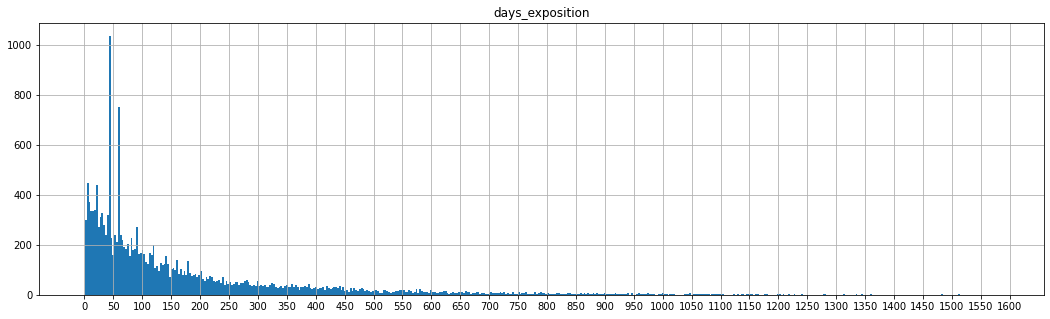

In [92]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['days_exposition'], bins=500, label='days_exposition')
plt.title('days_exposition')
plt.xticks(range(0, 1650, 50))
plt.grid()

plt.show()

Посмторим ближе на два выдающихся пика

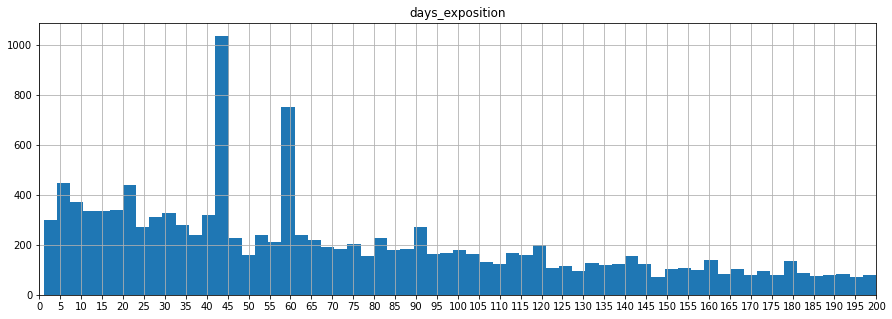

In [93]:
plt.figure(figsize=(15, 5))
plt.hist(data_clean['days_exposition'], bins=500, label='days_exposition', align='mid')
plt.xticks(range(0, 1600, 5))
plt.xlim(0, 200)
plt.grid()
plt.title('days_exposition')

plt.show()

Рассмотрим два выделяющихся пика поближе.

In [94]:
print(data_clean.query('40 <= days_exposition <= 55')['days_exposition'].value_counts())
print(data_clean.query('55 <= days_exposition <= 65')['days_exposition'].value_counts())

45.0    811
44.0    125
43.0     99
42.0     98
54.0     94
46.0     83
52.0     78
40.0     77
48.0     75
41.0     72
47.0     71
55.0     69
53.0     67
49.0     64
50.0     49
51.0     46
Name: days_exposition, dtype: int64
60.0    499
59.0     96
61.0     94
63.0     92
64.0     80
56.0     77
55.0     69
65.0     68
62.0     67
57.0     66
58.0     62
Name: days_exposition, dtype: int64


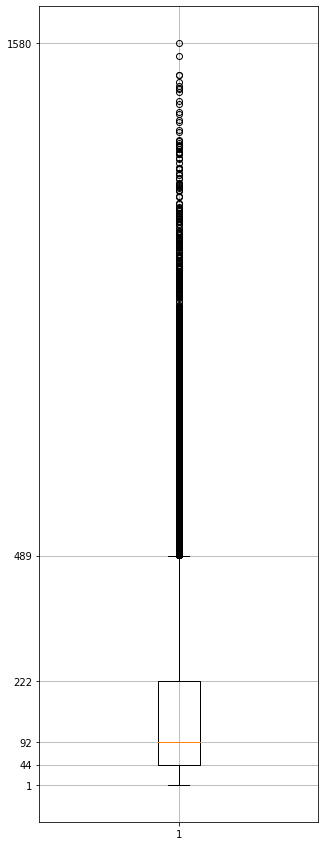

In [95]:
plt.figure(figsize=(5, 15))
boxplot = plt.boxplot(data_clean['days_exposition'].dropna())
quantiles = list(np.quantile(data_clean['days_exposition'].dropna(), 
                             np.array([0.00, 0.25, 0.50, 0.75, 1.00])))
quantiles.append(1.5 * (quantiles[3] - quantiles[1]) + quantiles[3])
plt.yticks(quantiles)
plt.grid()
plt.show()

По какой-то причине очень много объявлений снимались через 45 и 60 дней - подозрительно сильное отличие от остальных значений.
Возможно это связано с алгоритмами подбора объявлений и именно в эти промежутки времени они наиболее активно выдают квартиры в поиске. Либо именно такой срок отсутсвующей активности установлен для автоматического снятия объявления. 

Избавимся от редких значений. Согласно диаграмме размаха это значения превышающие 489 дней. Продавать квартиру почти полтора года - это уже выглядит сомнительно. Посмотрим, как много объявлений, висевших более 489 дней.

In [96]:
len(data_clean.query('days_exposition > 489'))/len(data_clean)

0.07210275372190328

В датасете есть объявления висевшие более трех лет! Вероятно такие объявления просто забывали снять с сайта и они не отображают реальной ситуации. Удалим все объявления, которые висели более 489 дня.

In [97]:
data_clean = data_clean.query('(days_exposition <= 489) or days_exposition.isna()')

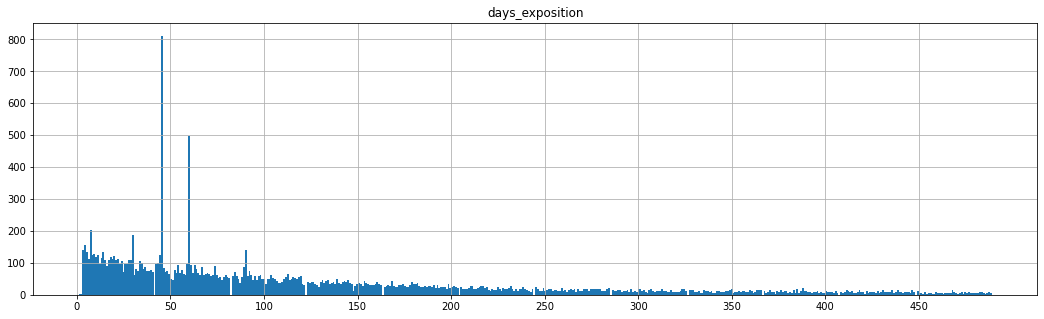

In [98]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['days_exposition'], bins=500, label='days_exposition')
plt.title('days_exposition')
plt.xticks(range(0, 500, 50))
plt.grid()

plt.show()

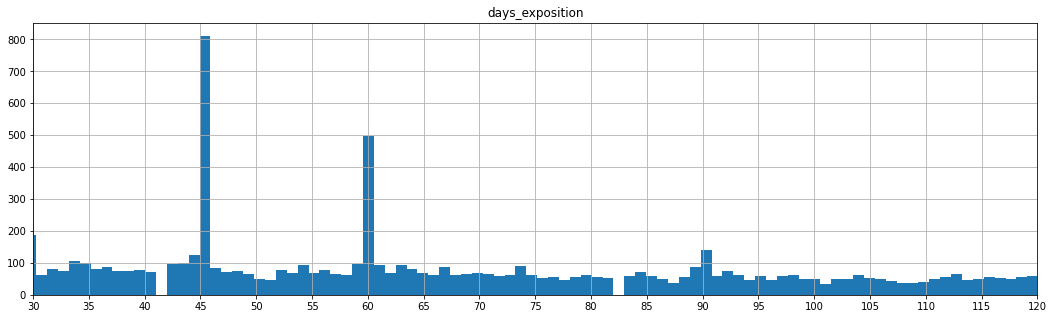

In [99]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['days_exposition'], bins=500, label='days_exposition')
plt.title('days_exposition')
plt.xticks(range(0, 500, 5))
plt.xlim((30, 120))
plt.grid()

plt.show()

Заметны какие-то пробелы в данных. Раньше их не было видно, данные с такими значениями не удалялись. Проверим, может просто отборажение гистаграммы так работает. так как видно, что пробелы появились с достаточной строгой периодичностью

In [100]:
print(data_clean.query('47 <= days_exposition <= 53')['days_exposition'].sort_values(axis=0).value_counts(sort=False))
print(data_clean.query('97 <= days_exposition <= 103')['days_exposition'].sort_values(axis=0).value_counts(sort=False))

47.0    71
48.0    75
49.0    64
50.0    49
51.0    46
52.0    78
53.0    67
Name: days_exposition, dtype: int64
97.0     59
98.0     62
99.0     48
100.0    49
101.0    35
102.0    48
103.0    50
Name: days_exposition, dtype: int64


Как видно, значения идут без прерываний, поэтому пробелы на гистограмме вызваны особенностями работы инструмента pyplot.

### Изучим ```total_images```

Остался столбец с данными о загруженных изображениях ```total_images```.

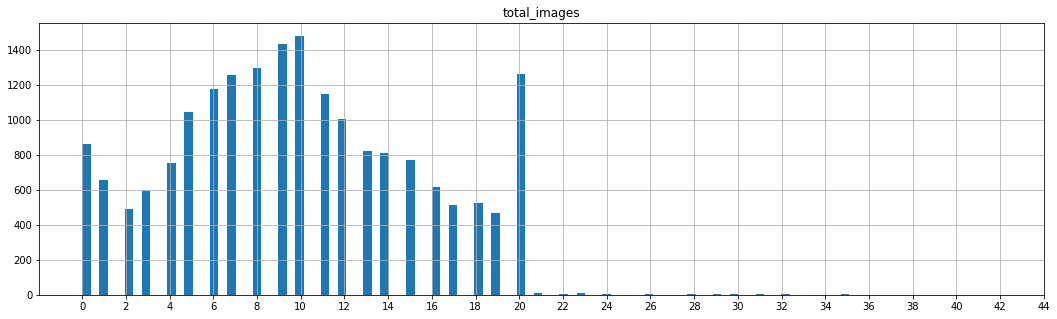

In [101]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['total_images'], bins=100, label='total_images')
plt.title('total_images')
plt.xticks(range(0, 46, 2))
plt.grid()

plt.show()

Избавимся от редких значений - объявлений в которых число фотографий больше 20.

In [102]:
data_clean = data_clean.query('total_images <= 20')

Вторая странность - это большое количество объявлений, где загружено 20 фотографий. Возможно при составлении объявления есть рекомендация о количестве фотографий. Посмотрим на диаграммы размаха этого признака относительно других признаков

In [103]:
def single_pairplot(data, feature, plot_kws={'s':15, 'alpha':0.3}, size=5):
    sns.pairplot(data, 
                 y_vars=list(data.columns),
                 x_vars=[feature],
                 size=size,
                 plot_kws=plot_kws);

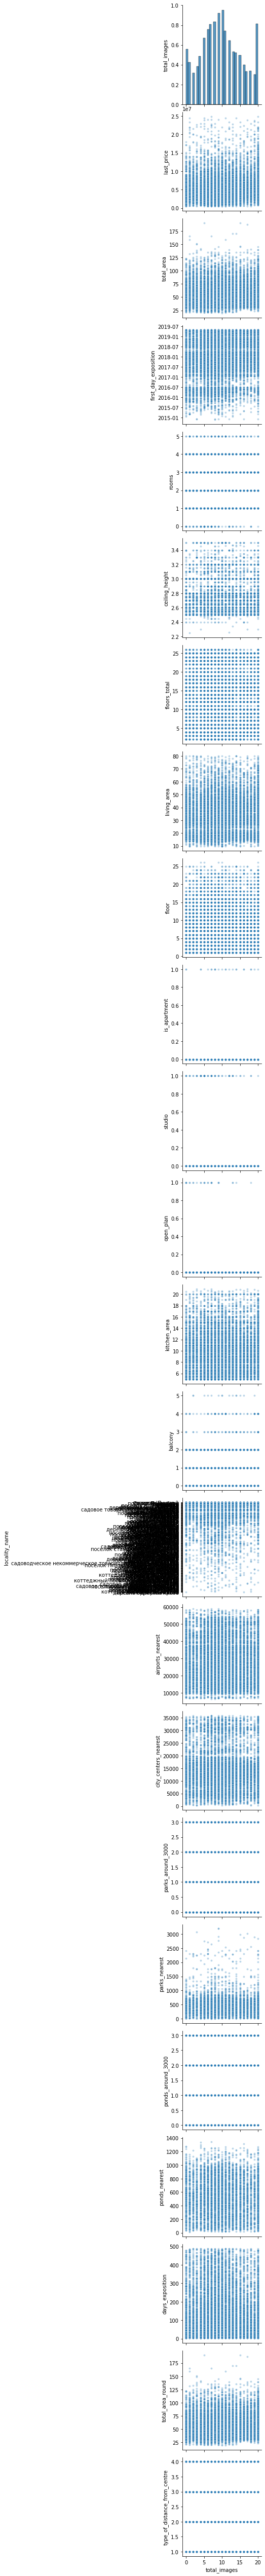

In [104]:
single_pairplot(data_clean, 'total_images', size=3)

На графиках не видно, чтобы объекты с 20 фотографиями имели какое-то аномальное скопление относительно значений других признаков. Видимо просто сам сайт дает рекомендацию о таком рекомендуемом кол-ве фотографий.

# Дополнительные столбцы

Добавим стобец ```price_of_square_meter``` с указанием стоимости квадратного метра для каждой квартиры.

In [105]:
data_clean['price_of_square_meter'] = data_clean['last_price'] / data_clean['total_area']

Добавим столбец ```day_week_exposition``` с указанием дня недели публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [106]:
data_clean['day_week_exposition'] = data_clean['first_day_exposition'].dt.dayofweek

Добавим столбец ```month_exposition``` с указанием месяца публикации объявления.

In [107]:
data_clean['month_exposition'] = data_clean['first_day_exposition'].dt.month

Добавим столбец ```year_exposition``` с указанием года публикации объявления.

In [108]:
data_clean['year_exposition'] = data_clean['first_day_exposition'].dt.year

Создадим функцию для определения типа этажа (```'первый'```, ```'последний'```, ```'другой'```)

In [109]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total == floor:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

Добавим столбец ```floor_type``` с указанием типа этажа.

In [110]:
data_clean['floor_type'] = data_clean.apply(floor_type, axis=1)

Добавим столбец ```city_centers_nearest_km``` с указанием округленного до км расстояния до центра.

In [111]:
data_clean['city_centers_nearest_km'] = (data_clean['city_centers_nearest'] / 1000).round()

Восстановим значения индексов в получившемся датасете.

Выведем первые 10 строк и общую информацию о датасете.

In [112]:
data_clean.reset_index(drop=True, inplace=True)
display(data_clean.head(10))
data_clean.info()

total_images  last_price  total_area first_day_exposition  rooms  \
0             7     3350000        40.4           2018-12-04      1   
1            10     2890000        30.4           2018-09-10      1   
2             6     3700000        37.3           2017-11-02      1   
3             5     7915000        71.6           2019-04-18      2   
4            18     5400000        61.0           2017-02-26      3   
5             5     5050000        39.6           2017-11-16      1   
6            10     3890000        54.0           2016-06-30      2   
7            20     3550000        42.8           2017-07-01      2   
8             1     4400000        36.0           2016-06-23      1   
9            16     4650000        39.0           2017-11-18      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.75            11         18.6      1          NaN  ...   
1            2.65            12         14.4      5          NaN  ...   
2            2.65            26         10.6      6          NaN  ...   
3            2.75            24         42.7     22          NaN  ...   
4            2.50             9         43.6      7          NaN  ...   
5            2.67            12         20.3      3          NaN  ...   
6            2.55             5         30.0      5          NaN  ...   
7            2.56             5         27.0      5          NaN  ...   
8            3.00             6         17.0      1          NaN  ...   
9            2.60            14         20.5      5          NaN  ...   

   ponds_nearest  days_exposition  total_area_round  \
0            NaN             81.0                40   
1            NaN             55.0                30   
2            NaN            155.0                37   
3            NaN              NaN                71   
4            NaN            289.0                61   
5          553.0            137.0                39   
6            NaN             90.0                54   
7          298.0            366.0                42   
8           96.0            203.0                36   
9          296.0             19.0                39   

   type_of_distance_from_centre price_of_square_meter  day_week_exposition  \
0                           2.0          82920.792079                    1   
1                           NaN          95065.789474                    0   
2                           2.0          99195.710456                    3   
3                           2.0         110544.692737                    3   
4                           2.0          88524.590164                    6   
5                           2.0         127525.252525                    3   
6                           NaN          72037.037037                    3   
7                           4.0          82943.925234                    5   
8                           4.0         122222.222222                    3   
9                           2.0         119230.769231                    5   

   month_exposition  year_exposition  floor_type  city_centers_nearest_km  
0                12             2018      первый                     19.0  
1                 9             2018      другой                      NaN  
2                11             2017      другой                     19.0  
3                 4             2019      другой                     12.0  
4                 2             2017      другой                     15.0  
5                11             2017      другой                     14.0  
6                 6             2016   последний                      NaN  
7                 7             2017   последний                     33.0  
8                 6             2016      первый                     31.0  
9                11             2017      другой                     14.0  

[10 rows x 30 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19017 entries, 0 to 19016
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  19017 non-null  int64         
 1   last_price                    19017 non-null  int64         
 2   total_area                    19017 non-null  float64       
 3   first_day_exposition          19017 non-null  datetime64[ns]
 4   rooms                         19017 non-null  int64         
 5   ceiling_height                19017 non-null  float64       
 6   floors_total                  19017 non-null  int64         
 7   living_area                   19017 non-null  float64       
 8   floor                         19017 non-null  int64         
 9   is_apartment                  2112 non-null   object        
 10  studio                        19017 non-null  bool          
 11  open_plan                   

# Изучение отдельных столбцов

## Изучим столбец ```total_area```

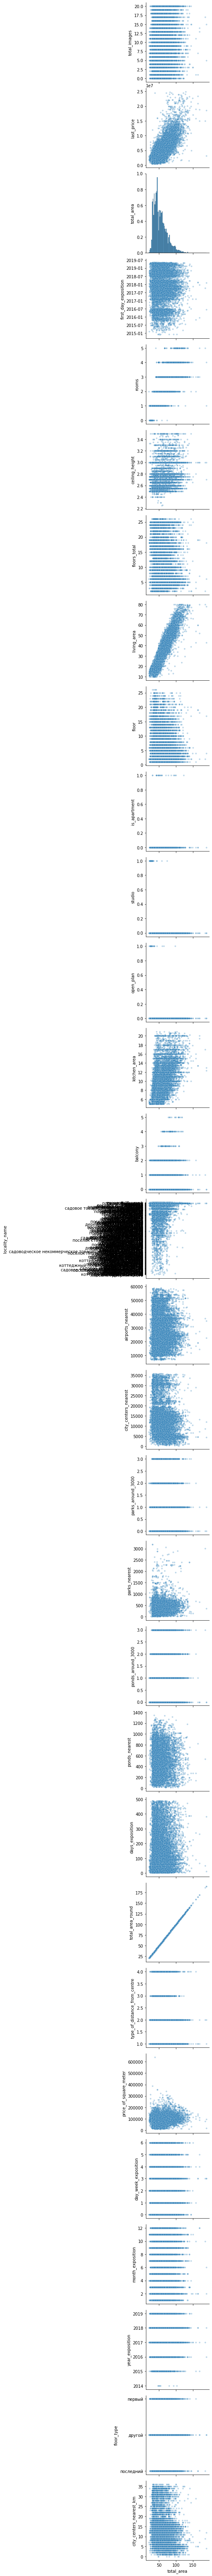

In [113]:
single_pairplot(data_clean, 'total_area', size=3)

Видно, что данный параметр коррелирует с last_price, living_area, kitchen_area - и все эти корреляции понятны и объяснимы.

Условно разобьем все квартиры на четыре группы по площади

In [114]:
def flat_size(total_area):
    if 0 < total_area < 50:
        return 'маленькая'
    elif 50 <= total_area <= 66:
        return 'средняя'
    elif 66 < total_area <= 80:
        return 'большая'
    elif total_area > 80:
        return 'огромная'
    else:
        return 'не определено'

In [115]:
data_clean['flat_size'] = data_clean['total_area'].apply(flat_size)

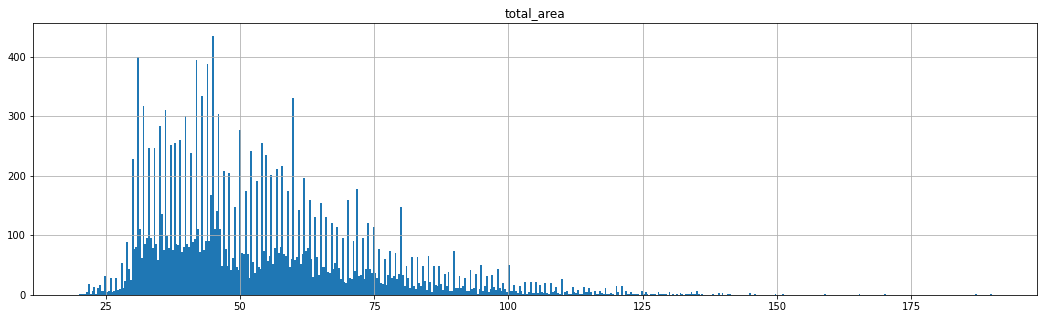

In [116]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['total_area'], bins=500, label='total_area')
plt.title('total_area')
plt.grid()

plt.show()

Видно высокие пики. Возможно это целые значения.

In [117]:
data_clean.query('41 <= total_area <= 46')['total_area'].value_counts().head(10)

45.0    377
42.0    342
44.0    312
43.0    274
46.0    255
41.0    202
44.5     58
45.5     45
44.6     40
45.2     40
Name: total_area, dtype: int64

Действиельно, целочисленные значения преобладают над площадями, где указаны десятые и сотые доли. Вероятно это связано с тем, что люди при размещении объявления округляют площадь своих квартир до целых чисел и в результате получаются представленные выше зубья гистограмм.

## Изучим столбец ```living_area``` и ```kitchen_area```

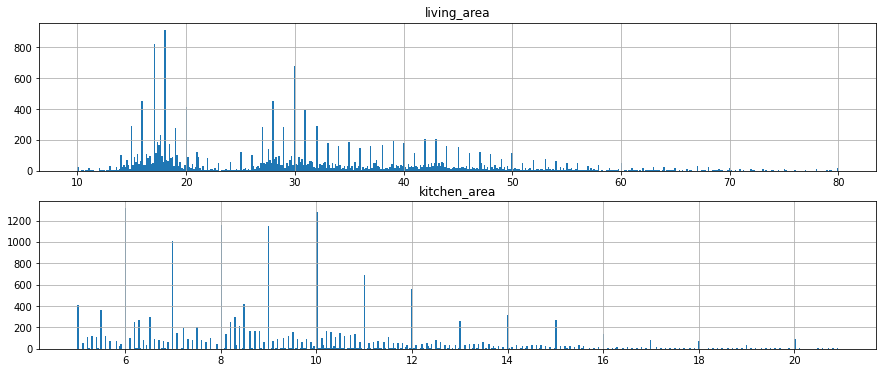

In [118]:
fig, (x0, x1) = plt.subplots(ncols=1, nrows=2, figsize=(15, 6))

x0.hist(data_clean['living_area'], bins=500, label='living_area')
x0.set_title('living_area')
x0.grid()
x1.hist(data_clean['kitchen_area'], bins=500, label='kitchen_area')
x1.set_title('kitchen_area')
x1.grid()

plt.show()

Видно несколько групп по жилой площади, между 10 и 20, в районе 30, и совсем небольшой пик после 40.

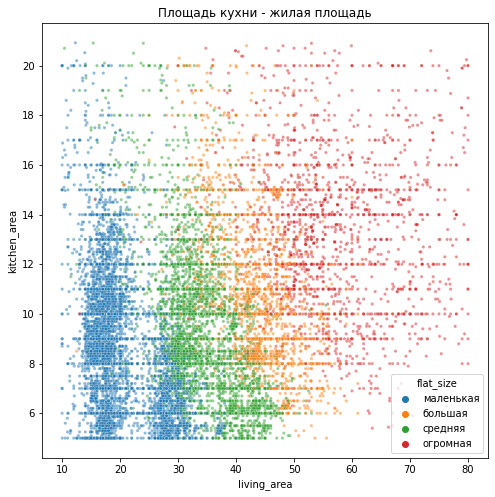

In [119]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data_clean['living_area'], 
                y=data_clean['kitchen_area'], 
                hue=data_clean['flat_size'], 
                alpha=0.5,
                s=10)
plt.title('Площадь кухни - жилая площадь')
plt.show()

Видно, что чем больше квартира,тем больше площадь кузни и жилая площадь. Но видно, что площадь кухонь изменяется не так быстро, как жилая - это логично, так как основная часть квартиры - это жилая площадь и именно она увеличивается в больших квартирах.

## Изучим столбец ```last_price```

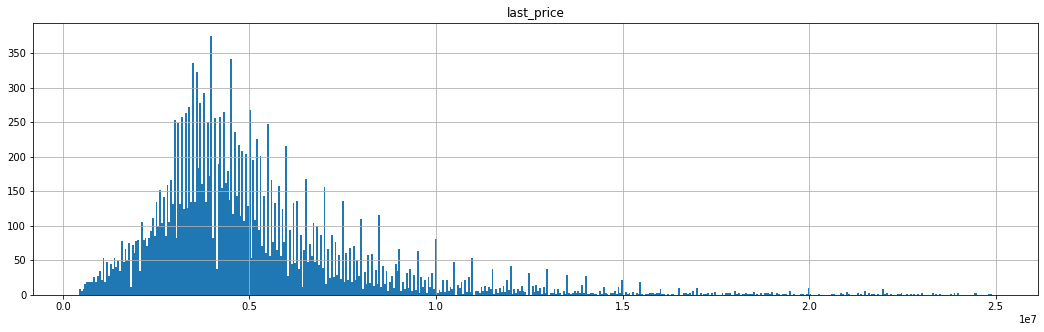

In [120]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['last_price'], bins=500, label='last_price')
plt.title('last_price')
plt.grid()

plt.show()

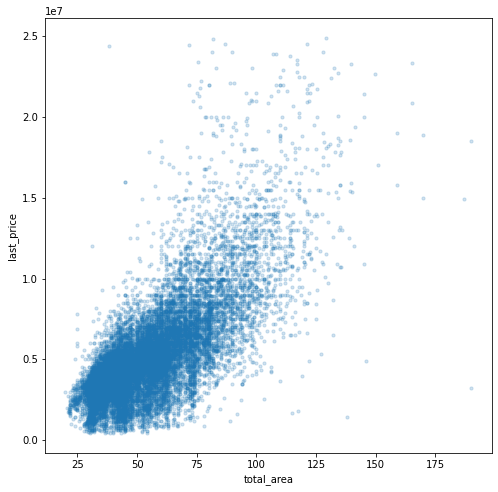

In [121]:
plt.figure(figsize=(8, 8))
plt.scatter(x=data_clean['total_area'], y=data_clean['last_price'], s=10, alpha=0.2)
plt.xlabel('total_area')
plt.ylabel('last_price')
plt.show()

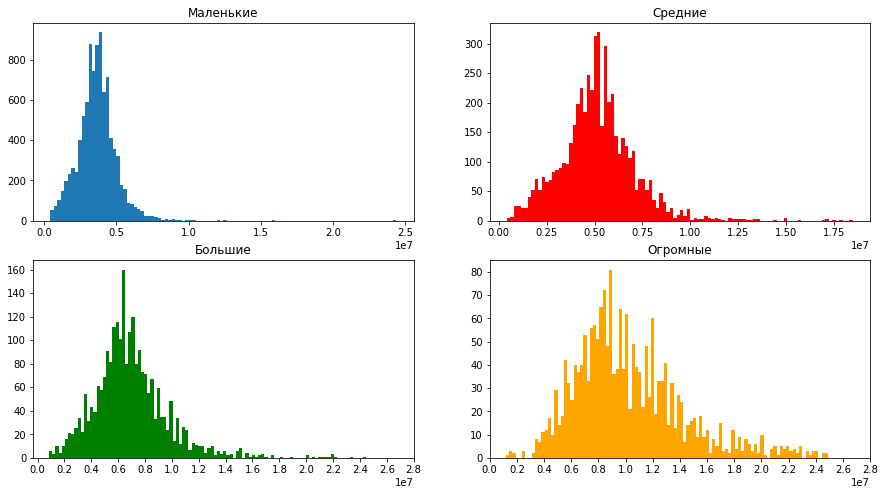

In [122]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

ax0.hist(data_clean[data_clean['flat_size']=='маленькая']['last_price'], bins=100)
ax0.set_title('Маленькие')
ax1.hist(data_clean[data_clean['flat_size']=='средняя']['last_price'], bins=100, color='red')
ax1.set_title('Средние')
ax2.hist(data_clean[data_clean['flat_size']=='большая']['last_price'], bins=100, color='green')
ax2.set_title('Большие')
ax2.set_xticks(np.arange(0, 30000000, 2000000))
ax3.hist(data_clean[data_clean['flat_size']=='огромная']['last_price'], bins=100, color='orange')
ax3.set_title('Огромные');
ax3.set_xticks(np.arange(0, 30000000, 2000000));

Цена подавляющего большинства квартир не превышет 10 млн рублей.

И в соответсвии с логикой средняя цена растет в каждой группе:

* для маленьких - около 4 млн рублей
* для средних - около 5 млн рублей
* для больших - около 6,5 млн рублей
* для огромных - около 9 млн рублей

## Изучим столбец ```rooms```

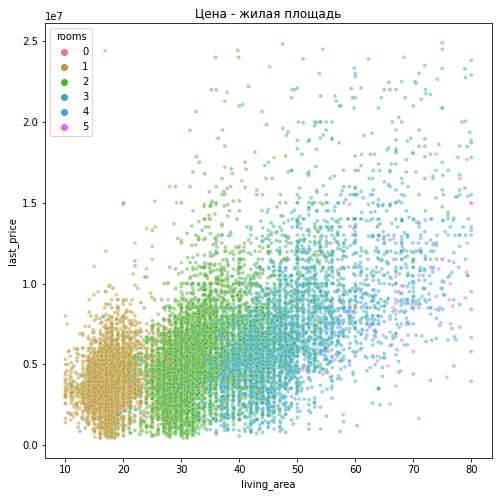

In [123]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data_clean['living_area'], 
                y=data_clean['last_price'], 
                hue=data_clean['rooms'], 
                alpha=0.5,
                palette=sns.color_palette('husl', 6),
                s=15)
plt.title('Цена - жилая площадь')
plt.show()

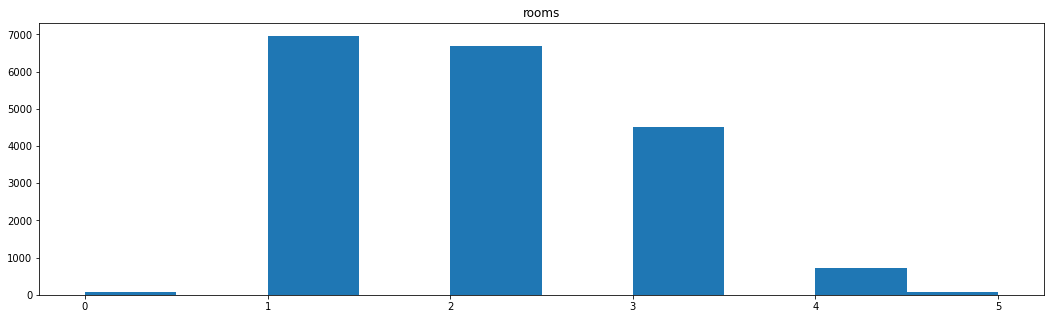

In [124]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['rooms'], label='rooms')
plt.title('rooms')

plt.show()

Больше всего однокомнатных квартир, значительное снижение происходит для 4-комнатных квартир и совсем мало 5-комнатных квартир. Видно, что 1- и 2-комнатные квартиры четко разделяются на две группы - именно им соответсвуют два первых отчетливых пика на гистограмме жилой площади

## Изучим столбец ```ceiling_height```

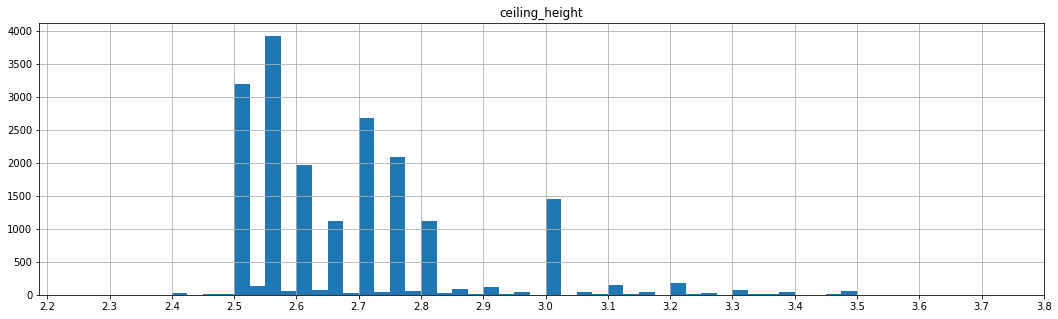

In [125]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['ceiling_height'], bins=50, label='ceiling_height')
plt.title('ceiling_height')
plt.xticks(np.arange(2.2, 3.9, 0.1))
plt.grid()

plt.show()

Есть 8 наиболее частых значений. Вероятно это стандартные высоты потолков в квартирах. Конечно точная высота потолка может отличаться в этих квартирах, но скорее всего люди не ставят целью посчитать высоту с точностью до сантиметров. Они указывают типичную для своего типа дома высоту потолка или округляют до десятых метра.

## Изучим столбец ```floor```

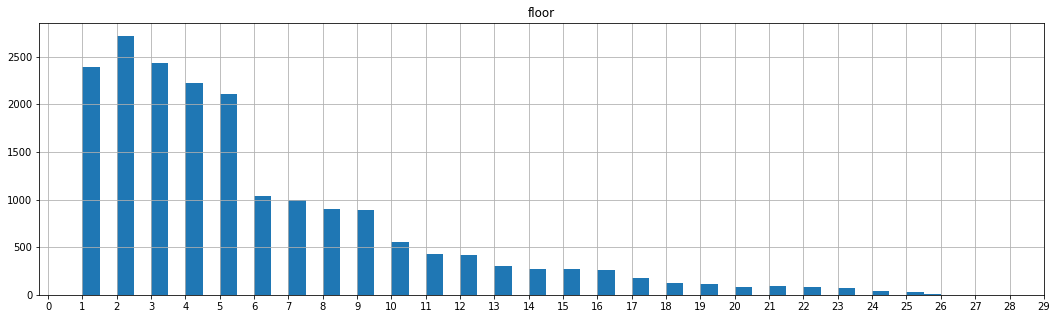

In [126]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['floor'], bins=50, label='floor')
plt.title('floor')
plt.xticks(np.arange(0, 30, 1))
plt.grid()

plt.show()

Больше всего квартир продается на втором этаже. Имеются ярковыраженные плато до 5 этажа, от 6 до 9 этажа, от 10 до 12, от 13 до 16 и от 17 и выше. Они вызваны наличием типовых домов соответсвующей этажности.

Разница в количестве вызвана тем, что 1, 2 или, например, 5 этаж есть как в пятиэтажке, так и в 9-этажке, так и в 16-этажке, а вот 13 этаж только в домах высотой не менее 13 этажей

## Изучим столбец ```floor_type```

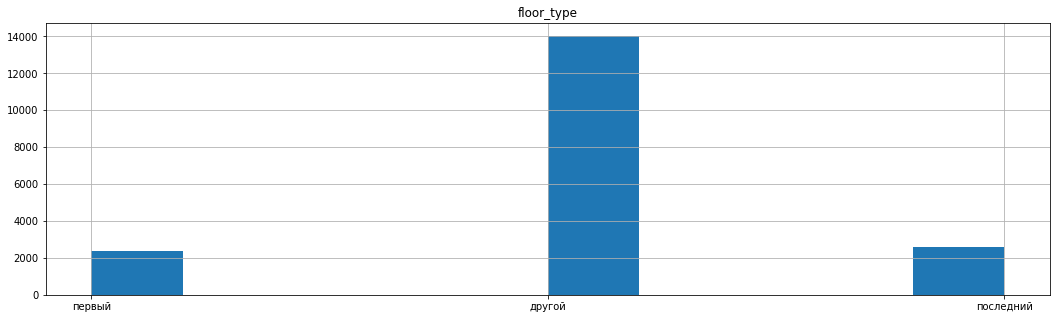

In [127]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['floor_type'], label='floor_type')
plt.title('floor_type')
plt.grid()

plt.show()

Квартир на первом и последнем этаже практически поровну. Основная масса квартир имеет этаж между первым и последним. Это логично, промежуточных этажей больше и шанс того, что квартира будет на одном из них выше.

## Изучим столбец ```floors_total```

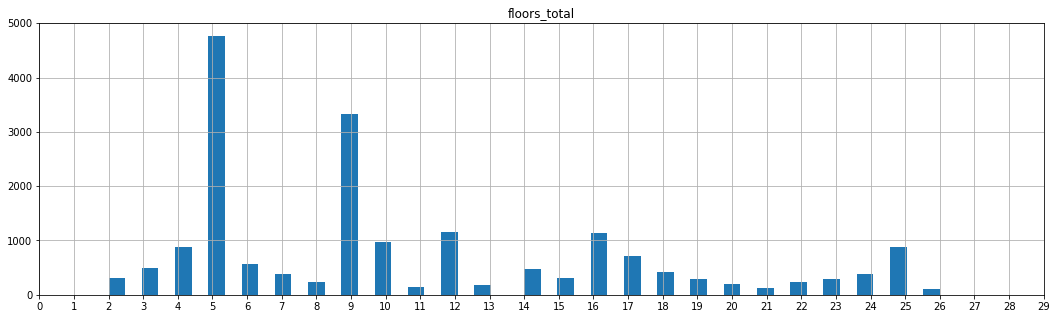

In [128]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['floors_total'], bins=50, label='floors_total')
plt.title('floors_total')
plt.xticks(range(0, 30, 1))
plt.grid()

plt.show()

Заметны четко выделяющиеся значения в 5, 9, 10, 12, 16 и 25 этажей. Как и говорилось раньше - это основные типы этажности для жилых домов в нашей стране. Причем заметно, что домов с этажностями 10, 12, 16 и 25 (это наиболее новые дома) меньше, если смотреть на каждую группу в отдельности. И только суммарное число всех этих новых домов превышает число 9-этажек или 5-этажек.

## Изучим столбец ```city_centers_nearest```

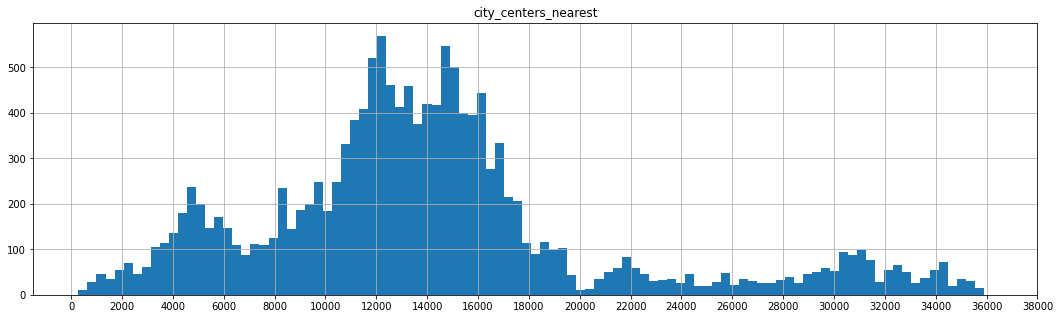

In [129]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['city_centers_nearest'], bins=100, label='city_centers_nearest')
plt.title('city_centers_nearest')
plt.xticks(range(0, 40000, 2000))
plt.grid()

plt.show()

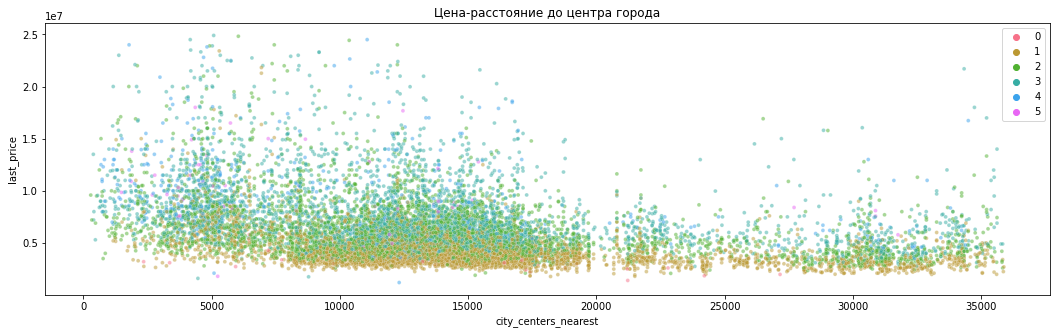

In [130]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=data_clean['city_centers_nearest'], 
                y=data_clean['last_price'], 
                hue=data_clean['rooms'], 
                alpha=0.5,
                palette=sns.color_palette('husl', 6),
                s=15)
plt.title('Цена-расстояние до центра города')
plt.legend(loc='upper right')
plt.show();

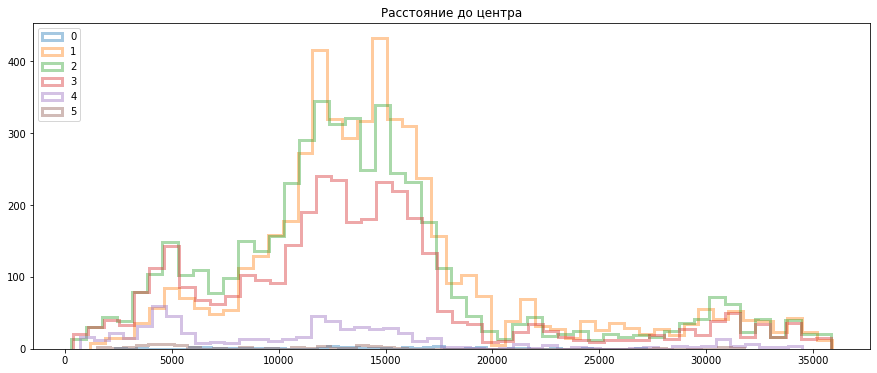

In [131]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
rooms = list(range(6))

for i in range(6):
    ax0.hist(data_clean[data_clean['rooms']==i]['city_centers_nearest'], 
             bins=50, 
             alpha=0.4, 
             histtype='step', 
             linewidth=3)
    ax0.set_title('Расстояние до центра')
    ax0.legend((list(range(6))))
    ax0.set_xticks(range(0, 40000, 5000))
    ax0.grid()

Судя по гистограмме квартир, расположенных в центре города практически нет. Видно две группы квартир - расположенных на расстоянии от 2 км до 7 км и от 7 км до 20 км. Все остальные, расположенные дальше 20 км от центра встречаются практически с той же частотой, что и картиры непосредстенно в центре города.

Также видно, что квартиры с различным числом комнат встречаются на любом расстоянии от центра города.

Также видно, что в центре (на рсстоянии 5 км) 3-комнатных квартир больше, чем однокомнатных, но к 10-15 км картина меняется, однокомнатные квартиры становятся самым частым типом жилья, а 3-комнатных меньше, чем 1-комнатных и 3-комнатных.

## Изучим столбец ```airports_nearest```

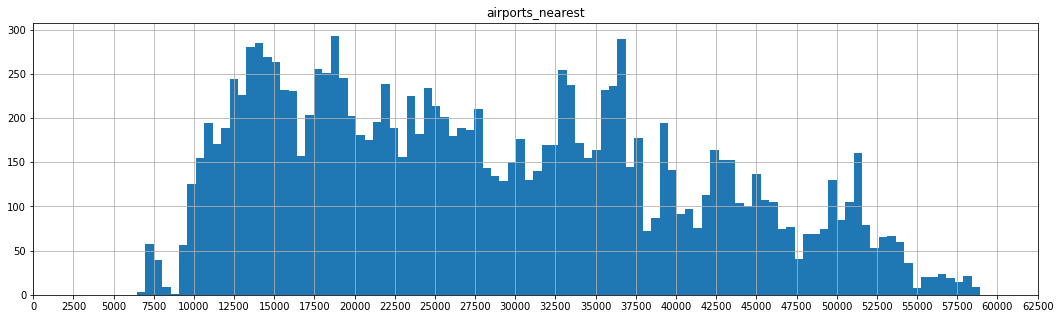

In [132]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['airports_nearest'], bins=100, label='airports_nearest')
plt.title('airports_nearest')
plt.xticks(range(0, 65000, 2500))
plt.grid()

plt.show()

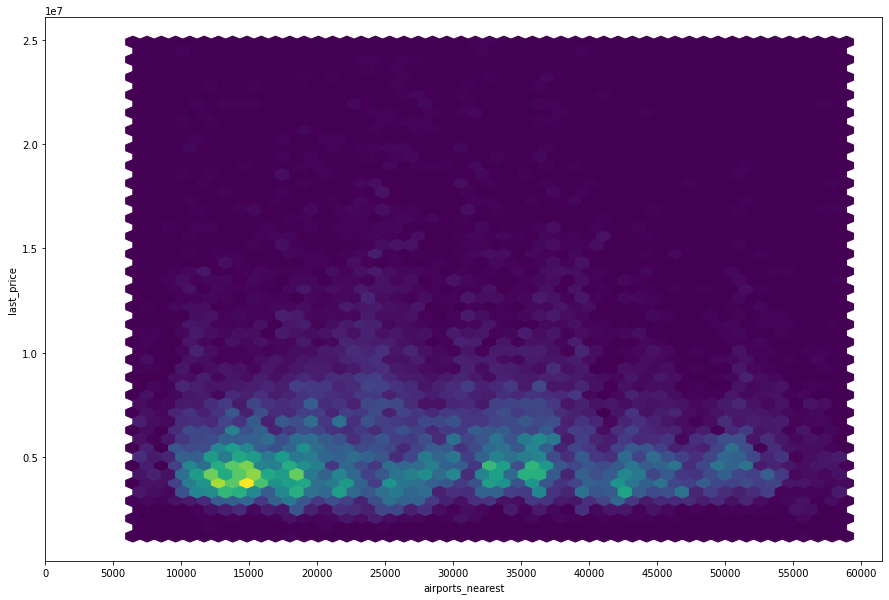

In [133]:
plt.figure(figsize=(15, 10))
plt.hexbin(data=data_clean[['last_price', 'airports_nearest']].dropna(), 
           y='last_price', 
           x='airports_nearest', gridsize=50)
plt.xlabel('airports_nearest')
plt.ylabel('last_price')
plt.xticks(range(0, 65000, 5000))

plt.show()

Меньше всего квартир расположено ближе 10 км от аэропрорта и дальше 55 км от аэропорта. Частота квартир падает по мере увеличения расстояния от аэропорта. Больше всего квартир расположено в диапазоне от 10 до 38 км. Средняя цена на квартиры по мереудаления от аэропорта никак не изменяется.

## Изучим столбец ```parks_nearest```

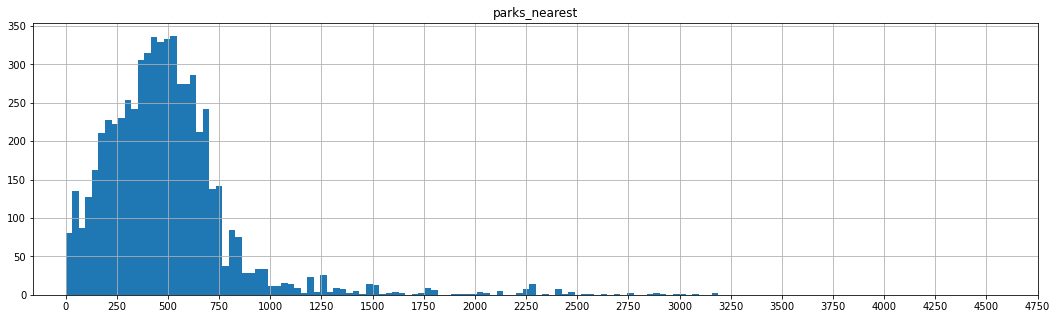

In [134]:
plt.figure(figsize=(18, 5))
plt.hist(data_clean['parks_nearest'], bins=100, label='parks_nearest')
plt.title('parks_nearest')
plt.xticks(range(0, 5000, 250))
plt.grid()

plt.show()

Большая масса квартир имеет парк на расстоянии до 1 км. Можно предположить, что это связано с тем, что квартиры расположены преимущественно в крупном городе, где число парков велико. Посмотрим на гистограмму распределения квартир по 20 городам с наибольшим числом объявлений.

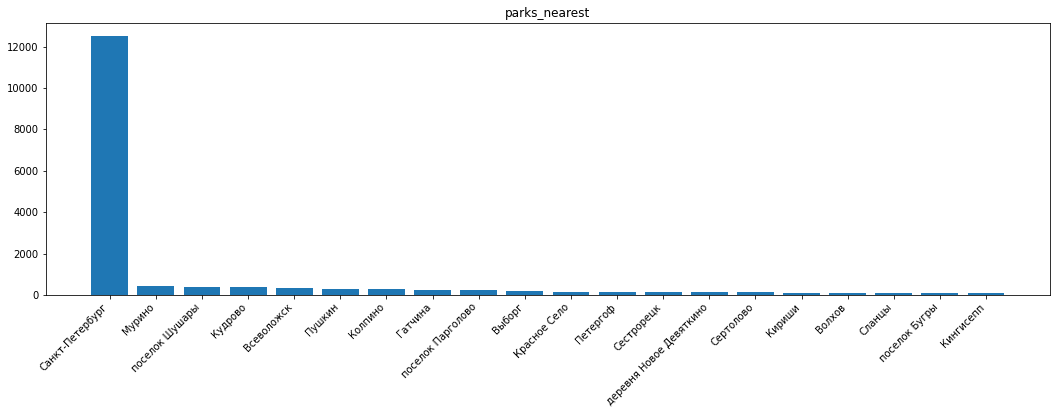

In [135]:
# построим столбчатую диаграмму для числа объявлений по первым 20 самым популярным населенным пунктам.
plt.figure(figsize=(18, 5))
plt.bar((data_clean.pivot_table(index='locality_name', 
                                     values='floor_type', 
                                     aggfunc='count').sort_values('floor_type', 
                                                                  ascending=False).head(20).reset_index())['locality_name'],
       height=(data_clean.pivot_table(index='locality_name', 
                                     values='floor_type', 
                                     aggfunc='count').sort_values('floor_type', 
                                                                  ascending=False).head(20).reset_index())['floor_type'])
plt.title('parks_nearest')
plt.xticks(rotation=45, horizontalalignment='right')
plt.axis()

plt.show()

Действительно подавляющее большинство объявлений - это объявления о продаже квартиры в Санкт-Петербурге.

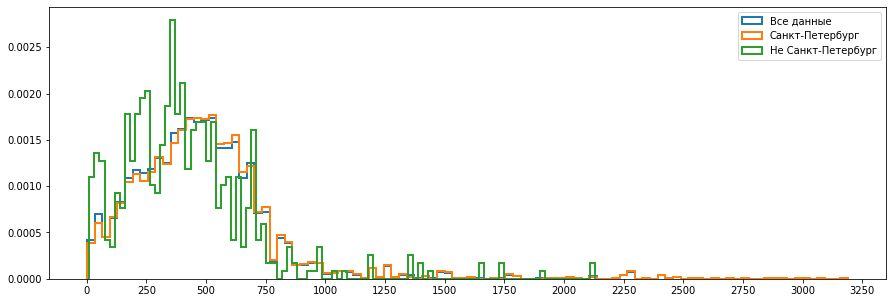

In [136]:
fig, ax0 = plt.subplots(ncols=1, nrows=1, figsize=(15,5))
ax0.hist(data_clean['parks_nearest'], 
         label='Все данные', 
         bins=100, 
         histtype='step', 
         linewidth=2, density=True)
ax0.hist(data_clean.query('locality_name == "Санкт-Петербург"')['parks_nearest'], 
         label='Санкт-Петербург', 
         bins=100, 
         histtype='step', 
         linewidth=2, density=True)
ax0.hist(data_clean.query('locality_name != "Санкт-Петербург"')['parks_nearest'], 
         label='Не Санкт-Петербург', 
         bins=100,
         histtype='step', 
         linewidth=2, density=True)
ax0.legend()
ax0.set_xticks(range(0, 3500, 250))
plt.show()

Но как можно заметить независимо от населенного пункта расстояние до парка зачастую не больше кимлометра, также видно, что квартиры с расстояние до парка больше 2.1 км есть только Санкт-Петербурге - это объясняется тем, что остальные города меньше и возможно их размер в принципе не позволяет оперировать такими расстояниями.

## Изучим столбец ```day_week_exposition``` и ```month_exposition```

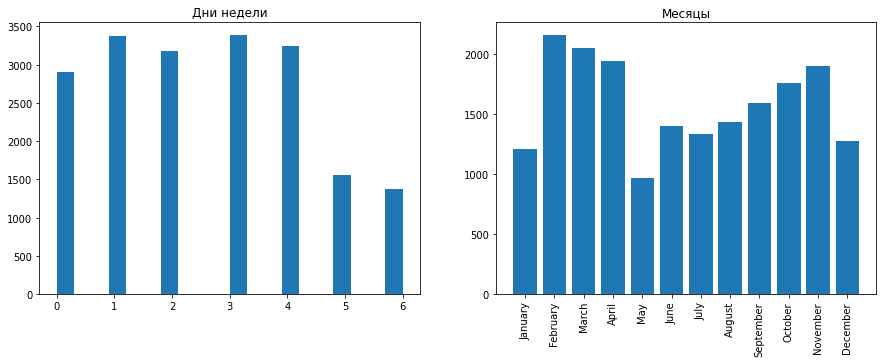

In [137]:
all_months = calendar.month_name[1:]

fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

ax0.hist(data_clean['day_week_exposition'], bins=20, align='mid')
ax0.set_title('Дни недели')
ax1.bar(x=data_clean.pivot_table(index='month_exposition', 
                                     values='floor_type', 
                                     aggfunc='count').reindex(index=all_months).reset_index()['month_exposition'],
        height=data_clean.pivot_table(index='month_exposition', 
                                     values='floor_type', 
                                     aggfunc='count').reset_index()['floor_type']
       )
ax1.set_xticklabels(labels=all_months, rotation=90)
ax1.set_title('Месяцы')

plt.show()

Видно, что в течение рабочей недели частота публикации объявлений особо не изменяется, а вот в выходные она резко снижается - не до объявлений. В масштабах года тоже происходит нечто похожее, меньше всего публикуют объявлений в месяцы с длинными государственными праздниками - январь, май; в традиционный отпускной сезон - июнь, июль, август и в декабре, что вероятно связано с приближением новогодних праздников.

## Изучим столбец ```days_exposition```

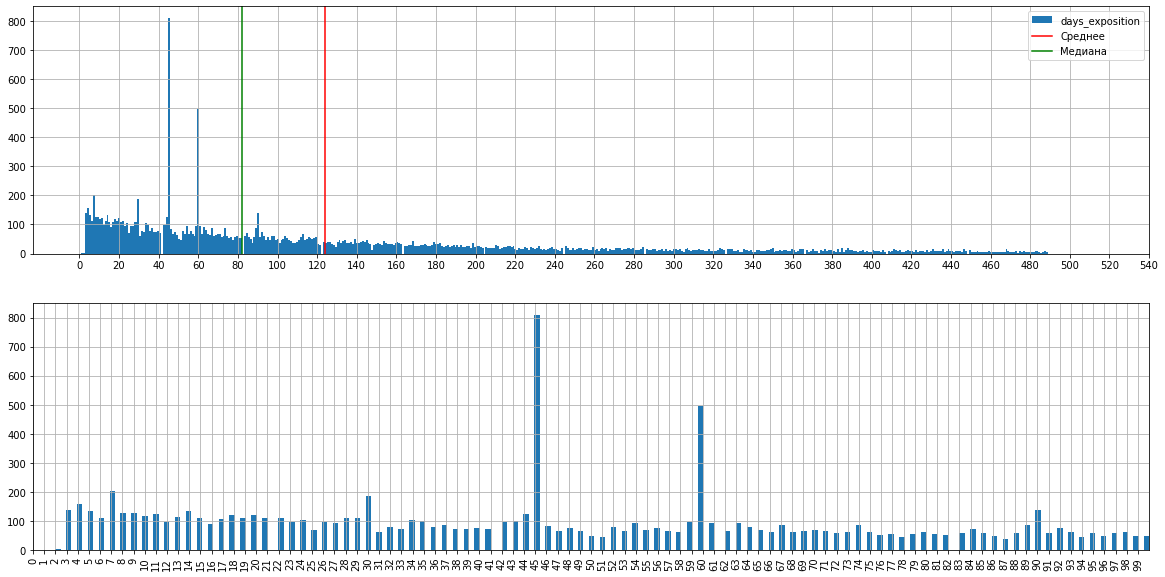

In [138]:
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(20, 10))

ax0.hist(data_clean['days_exposition'], bins=500, label='days_exposition')
ax0.grid()
ax0.set_xticks(range(0, 550, 20))
ax0.axvline(data_clean['days_exposition'].mean(), color='red', label='Среднее')
ax0.axvline(data_clean['days_exposition'].median(), color='green', label='Медиана')
ax0.legend()

ax1.hist(data_clean['days_exposition'], bins=1000, label='days_exposition')
ax1.grid()
ax1.set_xticks(range(0, 100, 1))
ax1.set_xlim(xmin=0, xmax=100)
ax1.set_xticklabels(labels=range(0, 100, 1), rotation=90)

plt.show()

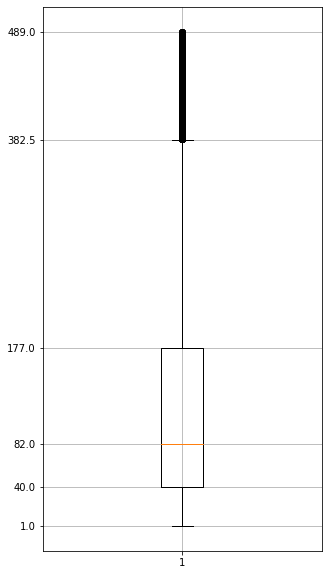

In [139]:
plt.figure(figsize=(5, 10))
boxplot = plt.boxplot(data_clean['days_exposition'].dropna())
quantiles = list(np.quantile(data_clean['days_exposition'].dropna(), 
                             np.array([0.00, 0.25, 0.50, 0.75, 1.00])))
quantiles.append(1.5 * (quantiles[3] - quantiles[1]) + quantiles[3])
plt.yticks(quantiles)
plt.grid()
plt.show()

Редкие значения с подозрительно долгим сроком продажи были удалены на этапе предобработки. Такими значениями были приняты сроки продажи более 489 дней.

В среднем продажа занимает от 42 до 184 дней, бысрыми продажами можно считать продажи раньше 42 дней - что интересно - таких продаж большинство (если не считать аномалии в 45 и 60 дней). Необычно долгими продажами, даже в очищенных данных можно считать продажи дольше 382 дней.

Из общей массы выбиваются 5 значений 7, 30, 45, 60 и 90 дней, но наиболее яркие это 45 и 60 дней.
Именно в такие сроки чаще продаются квартиры - числа не похожи на случайные - видна логика: неделя, месяц, полтора месяца, 2 и 3 месяца. Вероятно именно в эти периоды сайт напоминает клиентам о том, что их объявления авктивно и либо они его удаляют, так как вартира уже продана, либо перепубликуют объвления обновляя цену, данные и актуальность (удаляя старое объявление). Либо са а платформа сносит объявления в эти дни, если пользователь не продлевает объявление.

## Зависимость стоимости

### От общей площади квартиры

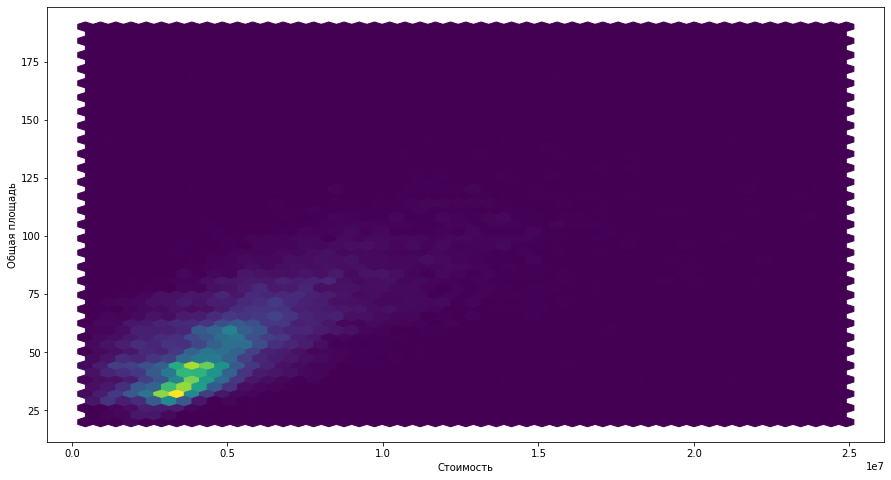

In [140]:
plt.figure(figsize=(15, 8))
plt.hexbin(data=data_clean, 
           x='last_price', 
           y='total_area',
           gridsize=50
          )
plt.xlabel('Стоимость')
plt.ylabel('Общая площадь')
plt.show()

In [141]:
data_clean['total_area'].corr(data_clean['last_price'])

0.7268710006857512

Коэфициент корреляции ближе к единице, и по тепловой карте тоже хорошо заметна корреляция: с увеличением площади квартиры возрастает и цена.

### От жилой площади квартиры

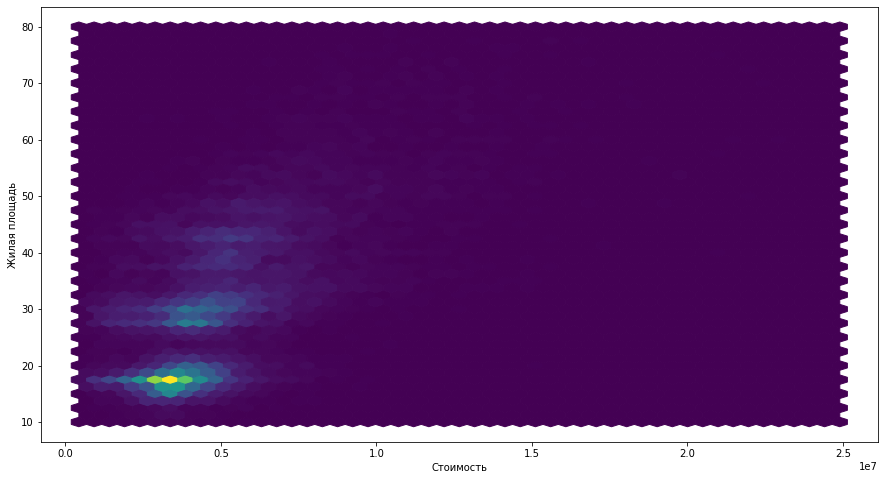

In [142]:
plt.figure(figsize=(15, 8))
plt.hexbin(data=data_clean, 
           x='last_price', 
           y='living_area',
           gridsize=50
          )
plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь')
plt.show()

In [143]:
data_clean['last_price'].corr(data_clean['living_area'])

0.6204345704150717

Жилая площадь в меньшей степени влияет на стоимость. Но с увеличением площади зависимость становится более заметной. Так как с увеличением жилой площади, ее удельное значение все больше. Ранее было выявлено, что площадь кухонь не особо меняется с увеличением общей площади, а вот жилая растет одновременно с общей и занимает все больше процентов от всей квартиры.

### От площади кухни

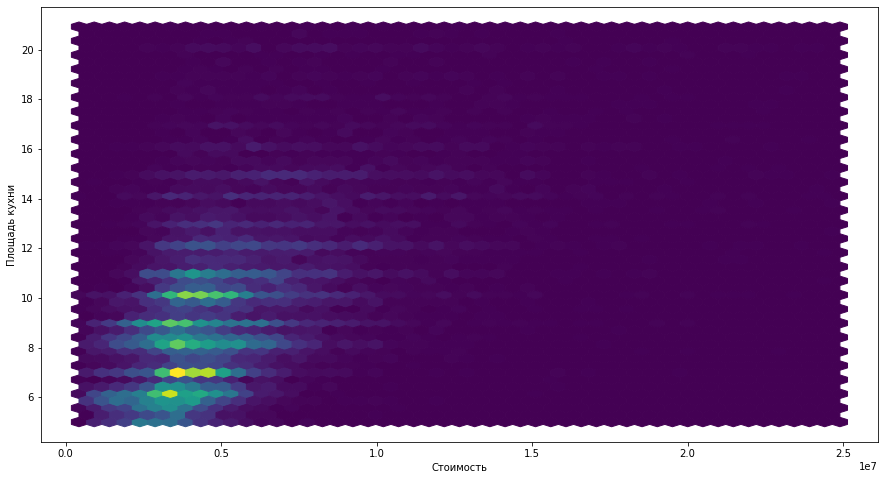

In [144]:
plt.figure(figsize=(15, 8))
plt.hexbin(data=data_clean, 
           x='last_price', 
           y='kitchen_area',
           gridsize=50
          )
plt.xlabel('Стоимость')
plt.ylabel('Площадь кухни')
plt.show()

In [145]:
data_clean['last_price'].corr(data_clean['kitchen_area'])

0.5306260477403122

Площадь кухни меньше всех остальных площадей влияет на стоимость - заметна небольшая корреляция на площадях больше 10 кв.м. Все логично - плятят обычно не за площаадь кухна, а за жилое пространство.

### От числа комнат

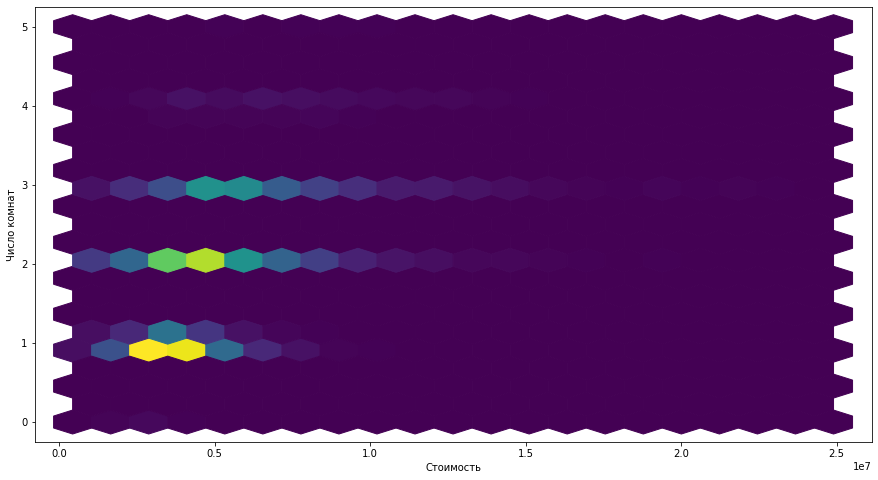

In [146]:
plt.figure(figsize=(15, 8))
plt.hexbin(data=data_clean, 
           x='last_price', 
           y='rooms',
           gridsize=20
          )
plt.xlabel('Стоимость')
plt.ylabel('Число комнат')
plt.show()

Коэффициент корреляции ближе к 0, чем к единице, но по тепловой карте все еще заметна связь роста стоимсоти с ростом числа комнат.

### От типа этажа

In [147]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19017 entries, 0 to 19016
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  19017 non-null  int64         
 1   last_price                    19017 non-null  int64         
 2   total_area                    19017 non-null  float64       
 3   first_day_exposition          19017 non-null  datetime64[ns]
 4   rooms                         19017 non-null  int64         
 5   ceiling_height                19017 non-null  float64       
 6   floors_total                  19017 non-null  int64         
 7   living_area                   19017 non-null  float64       
 8   floor                         19017 non-null  int64         
 9   is_apartment                  2112 non-null   object        
 10  studio                        19017 non-null  bool          
 11  open_plan                   

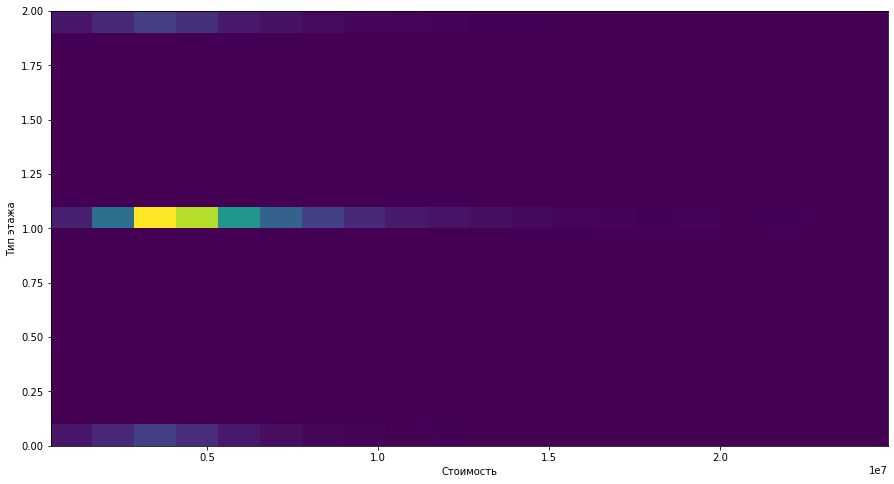

In [148]:
plt.figure(figsize=(15, 8))
data_clean
plt.hist2d(x=data_clean['last_price'], y=data_clean['floor_type'].replace({'первый' : 0, 
                                                                           'другой' : 1, 
                                                                           'последний' : 2}), bins=20)
plt.xlabel('Стоимость')
plt.ylabel('Тип этажа')
plt.show()

Коэффициент корреляции между колличественной и категориальной паременной посчитать не получится, но по тепловой карте видно, что особой зависимости цены от типа этажа нет - выделяющаяся группа этажей "другой" обусловлена тем, что в ней значительно больше объявлений, чем в других группах. Но для всех трех групп свойственно правило - чем выше цена, тем меньше объявлений содержат такую цену.

### От даты размещения

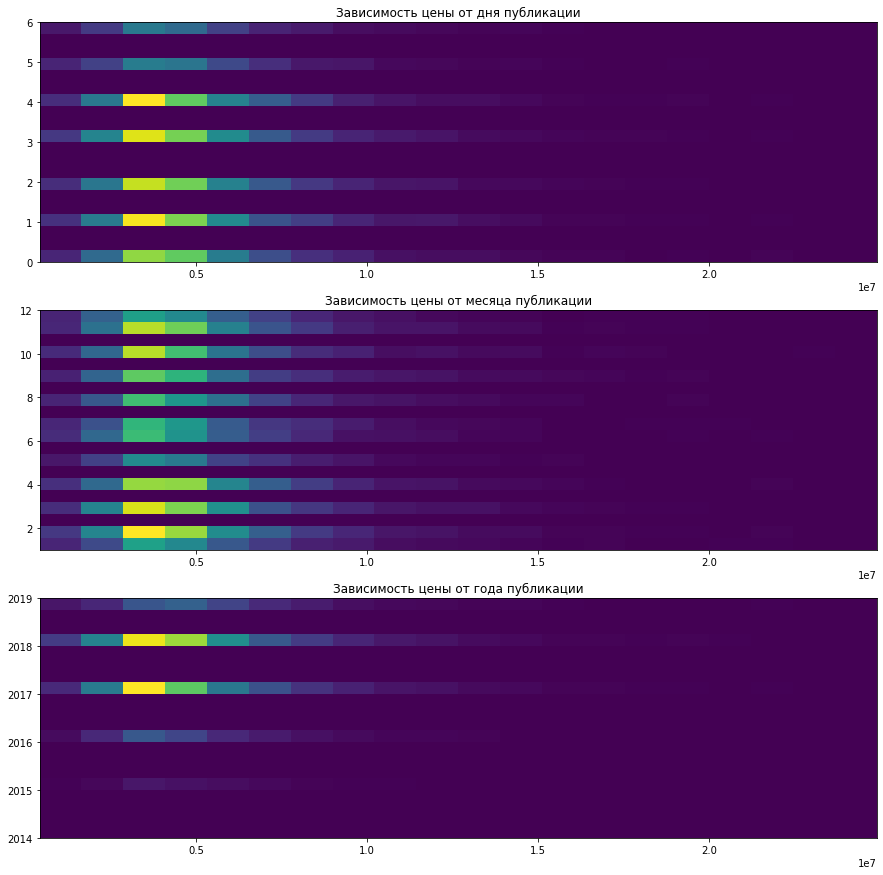

In [149]:
fig, ((ax0), (ax1), (ax2)) = plt.subplots(ncols=1, nrows=3, figsize=(15, 15))

ax0.hist2d(data=data_clean, 
           x='last_price', 
           y='day_week_exposition', 
           bins=20)
ax0.set_title('Зависимость цены от дня публикации')
ax1.hist2d(data=data_clean, 
           x='last_price', 
           y='month_exposition', 
           bins=20)
ax1.set_title('Зависимость цены от месяца публикации')
ax2.hist2d(data=data_clean, 
           x='last_price', 
           y='year_exposition', 
           bins=20)
ax2.set_title('Зависимость цены от года публикации')
plt.show()

По тепловым картам, видно, что от дня публикации, месяца или года цена практически не зависит. Изменяется число опубликованных объявлений, но цена стабильно держится в пределах наиболее популярных значений до 10 млн рублей.

## Исследование цены квадратного метра

In [150]:
price_of_square_meter_features = data_clean.pivot_table(index='locality_name', 
                       values='price_of_square_meter', 
                       aggfunc=['count', 
                                'median', 
                                'min', 
                                'max']).sort_values([('count', 
                                                      'price_of_square_meter')], 
                                                    ascending=False)
price_of_square_meter_features.columns=['count_of_flats', 
                                        'median_price_of_square_meter', 
                                        'min_price_of_square_meter', 
                                        'max_price_of_square_meter']
price_of_square_meter_features = price_of_square_meter_features.reset_index()
display(price_of_square_meter_features.head(10))

print('Минимальная медианная стоимсоть квадратного метра')
display(price_of_square_meter_features.query('median_price_of_square_meter == @price_of_square_meter_features["median_price_of_square_meter"].min()'))

print('Максимальная медианная стоимсоть квадратного метра')
display(price_of_square_meter_features.query('median_price_of_square_meter == @price_of_square_meter_features["median_price_of_square_meter"].max()'))

print('Минимальная стоимсоть квадратного метра')
display(price_of_square_meter_features.query('min_price_of_square_meter == @price_of_square_meter_features["min_price_of_square_meter"].min()'))

print('Максимальная стоимсоть квадратного метра')
display(price_of_square_meter_features.query('max_price_of_square_meter == @price_of_square_meter_features["max_price_of_square_meter"].max()'))

locality_name  count_of_flats  median_price_of_square_meter  \
0    Санкт-Петербург           12508                 102886.752137   
1             Мурино             437                  86455.331412   
2     поселок Шушары             400                  76625.586854   
3            Кудрово             389                  96153.846154   
4         Всеволожск             337                  65333.333333   
5             Пушкин             306                  98482.568551   
6            Колпино             305                  74324.324324   
7            Гатчина             261                  67187.500000   
8  поселок Парголово             221                  92307.692308   
9             Выборг             203                  58108.108108   

   min_price_of_square_meter  max_price_of_square_meter  
0               15345.268542              387096.774194  
1               50000.000000              138580.246914  
2               47700.416089              126666.666667  
3               63723.323077              160401.002506  
4               31400.000000              640422.350472  
5               59836.065574              167410.714286  
6               47957.371226              118694.362018  
7               10507.246377              146315.789474  
8               48405.466970              138522.427441  
9               18750.000000               94805.194805

Минимальная медианная стоимсоть квадратного метра


locality_name  count_of_flats  median_price_of_square_meter  \
162  деревня Старополье               3                       11000.0   

     min_price_of_square_meter  max_price_of_square_meter  
162               10368.663594                    12250.0

Максимальная медианная стоимсоть квадратного метра


locality_name  count_of_flats  median_price_of_square_meter  \
186  поселок Лисий Нос               2                  113728.34873   

     min_price_of_square_meter  max_price_of_square_meter  
186                    58750.0               168706.69746

Минимальная стоимсоть квадратного метра


locality_name  count_of_flats  median_price_of_square_meter  \
193  поселок станции Свирь               2                  11481.481481   

     min_price_of_square_meter  max_price_of_square_meter  
193                7962.962963                    15000.0

Максимальная стоимсоть квадратного метра


locality_name  count_of_flats  median_price_of_square_meter  \
4    Всеволожск             337                  65333.333333   

   min_price_of_square_meter  max_price_of_square_meter  
4                    31400.0              640422.350472

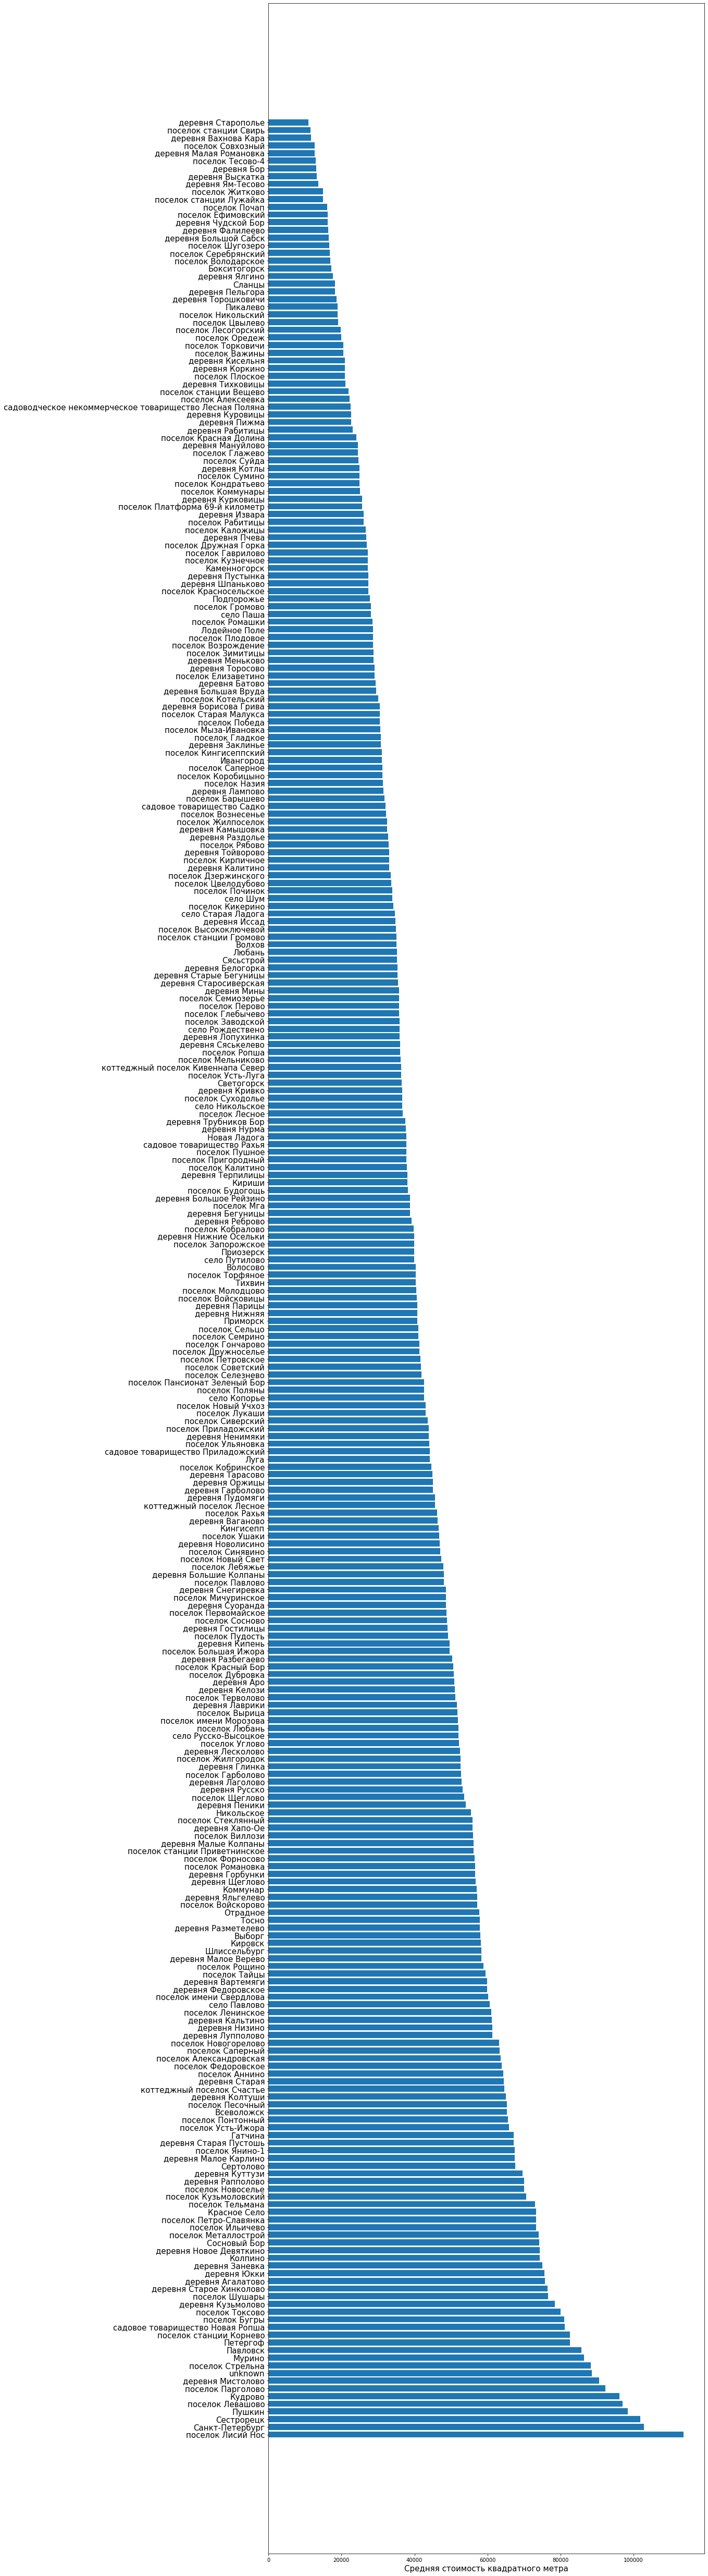

In [151]:
price_of_square_meter_features = price_of_square_meter_features.sort_values('median_price_of_square_meter', 
                                                                            ascending=False)

plt.figure(figsize=(15, 90))
plt.barh(data=price_of_square_meter_features,
         y='locality_name', 
         width='median_price_of_square_meter')
plt.xlabel('Средняя стоимость квадратного метра', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [152]:
print('Число объявлений в Санкт-Петербурге', len(data_clean[data_clean['locality_name'] == 'Санкт-Петербург']))
print('Число объявлений в поселке Лисий Нос', len(data_clean[data_clean['locality_name'] == 'поселок Лисий Нос']))

Число объявлений в Санкт-Петербурге 12508
Число объявлений в поселке Лисий Нос 2


Максимальная средняя стоимость квадратного метра оказалась не в Санкт-Петербурге, а в поселке Лисий Нос, но это не означает, что в поселке Лисий Нос недвижимость дороже Питерской. В датасете имеется всего 2 объявления в данном поселке - и они практичсеки не отражают стоимость недвижимости, в отичие от 12,5 тыс. объявлений в Санкт-Петербурге.

## Исследование расстояния до центра города (для Санкт-Петербурга)

In [153]:
data_clean_saint_petesrburg = data_clean.query('locality_name == "Санкт-Петербург"')
data_clean_saint_petesrburg

total_images  last_price  total_area first_day_exposition  rooms  \
3                 5     7915000        71.6           2019-04-18      2   
4                18     5400000        61.0           2017-02-26      3   
5                 5     5050000        39.6           2017-11-16      1   
9                16     4650000        39.0           2017-11-18      1   
10               11     6700000        82.0           2017-11-23      3   
...             ...         ...         ...                  ...    ...   
19007             8     3300000        31.0           2017-04-29      1   
19008             6     3200000        39.0           2017-12-16      1   
19009            19     9200000       101.0           2019-04-01      3   
19010            13     3550000        35.3           2018-02-28      1   
19011             3     5500000        52.0           2018-07-19      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
3                2.75            24         42.7     22          NaN  ...   
4                2.50             9         43.6      7          NaN  ...   
5                2.67            12         20.3      3          NaN  ...   
9                2.60            14         20.5      5          NaN  ...   
10               3.05             5         55.6      1          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
19007            2.55             9         18.0      6          NaN  ...   
19008            2.55             9         20.0      6          NaN  ...   
19009            3.05            15         63.0     12          NaN  ...   
19010            2.86            15         16.3      4          NaN  ...   
19011            2.55             5         31.0      2          NaN  ...   

       days_exposition  total_area_round  type_of_distance_from_centre  \
3                  NaN                71                           2.0   
4                289.0                61                           2.0   
5                137.0                39                           2.0   
9                 19.0                39                           2.0   
10               397.0                82                           2.0   
...                ...               ...                           ...   
19007            193.0                31                           2.0   
19008             38.0                39                           2.0   
19009             23.0               101                           2.0   
19010             29.0                35                           2.0   
19011             15.0                52                           1.0   

       price_of_square_meter day_week_exposition  month_exposition  \
3              110544.692737                   3                 4   
4               88524.590164                   6                 2   
5              127525.252525                   3                11   
9              119230.769231                   5                11   
10              81707.317073                   3                11   
...                      ...                 ...               ...   
19007          106451.612903                   5                 4   
19008           82051.282051                   5                12   
19009           91089.108911                   0                 4   
19010          100566.572238                   2                 2   
19011          105769.230769                   3                 7   

       year_exposition  floor_type  city_centers_nearest_km  flat_size  
3                 2019      другой                     12.0    большая  
4                 2017      другой                     15.0    средняя  
5                 2017      другой                     14.0  маленькая  
9                 2017      другой                     14.0  маленькая  
10                2017      первый                     11.0   огромная  
...          

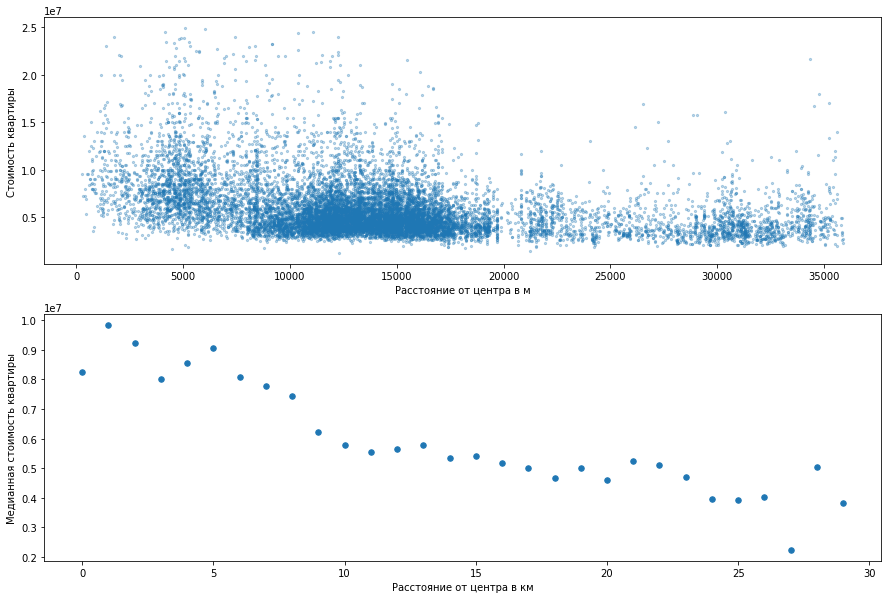

In [154]:
mean_price_for_km_SP = data_clean_saint_petesrburg.pivot_table(index='city_centers_nearest_km', 
                                           values='last_price', 
                                           aggfunc='mean').reset_index()

mean_price_for_km_SP.columns = ['city_centers_nearest_km', 'mean_last_price']

figure, ((ax0), (ax1)) = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))
ax0.scatter(data=data_clean, 
            x='city_centers_nearest', 
            y='last_price', s=5, alpha=0.3)
ax0.set_xlabel('Расстояние от центра в м')
ax0.set_ylabel('Стоимость квартиры')

ax1.scatter(data=mean_price_for_km_SP, 
            x='city_centers_nearest_km', 
            y='mean_last_price', s=30, alpha=1)
ax1.set_xlabel('Расстояние от центра в км')
ax1.set_ylabel('Медианная стоимость квартиры')

plt.show()

In [155]:
print('Коэффициент корреляции между расстоянием до центра и средней стоимсотью квартиры на таком расстоянии:', 
      mean_price_for_km_SP['mean_last_price'].corr(mean_price_for_km_SP['city_centers_nearest_km']))
print('Коэффициент корреляции между расстоянием до центра и стоимсотью квартир на таком расстоянии:', 
      data_clean_saint_petesrburg['last_price'].corr(data_clean_saint_petesrburg['city_centers_nearest']))

Коэффициент корреляции между расстоянием до центра и средней стоимсотью квартиры на таком расстоянии: -0.9171122791828898
Коэффициент корреляции между расстоянием до центра и стоимсотью квартир на таком расстоянии: -0.37282616085309134


Средняя стоимсоть квартир на определенном расстоянии от центра значительно зависит от этого расстояния. При отдалении от центра, средняя стоимсть квартир снижается.

По диаграмме рассеивания "стоимсоть-расстояние до центра" видно, что ярковыраженной корреляции для цен нет. При отдалении от центра число дорогих квартир снижается, а число дешевых возрастает - отсуда и корреляция со средней стоимостью. Примерно после 19 км от центра число продаваемых квартир резко снижается, а дорогие квартиры (дороже 15 млн) вовсе не встречаются, а после 25 км все квартиры стоят менее 10 млн рублей.

# Выводы

Для повышения качества исследования полученные данные были очищены от ошибок, аномальных значений, дубликатов и пропусков.

Были изучены все значимые данные, при необходимости они были разбиты на группы и исследованы в рамках этих групп, так как закономерности внутри отдельных групп могут отличаться от закономерностей в рамках всего датасета.

На основе имеющихся данных были получены дополнительные параметры, которые более наглядно могут отображать некоторые из закономерностей.

Было изучено влияние различных параметров на стоимость квартир, определены вероятные ошибки в работе платформы при формировании датасета и предложены решения по улучшению процесса сбора данных.

Даны некоторые рекомендации по оптимизации данных и способу их сбора.

1. Пльзователи зачастую округляют площади - поэтому есть ряд наиболее распространенных целых значений как для общей площади, так и для отдельных площадей жилого простарнства и кухонь. Аналогичная картина наблюдается и для высот потолков.

2. В среднем квартиры продавались по цене не выше 10 млн рублей, а их стоимость в основном зависила от общей площади квартиры.

3. Наибольшая активность в области публикации объявлений происходила в рабочие дни, а наиболее активные месяцы - это месяцы без отпусков и длинных государственных праздников.

4. Квартиры преимущественно расположены в типовых домах со стандартным рядом этажностей : 5, 9, 10, 12, 16, 25 этажей.

5. Большинство квартир имеют не более трех комнат и обычно не имеют балконов.

6. Гораздо чаще рядом с домом есть водоемы, в отличие от парков.

7. Была найдена странная аномалия, связанная с длительностью активности объявления. Есть большая часть объявлений снятых на 45 и 60 день после публикации. Вероятно особенности работы платформы - сносит объявление, которое не продлили. Также всплески закрытия объявлений - это 7 дней, 30 дней и 90 дней.

8. Имеются странности в картографических данных - если в радиусе 3 км от квартиры нет прудов или парков, то расстояние до ближайшего пруда или парка не определяется - в таких ячейках пропуски. Но! Имеются 4 строки, где парка в радиусе 3 км нет, а расстояние до ближайщего парка указано. Лучше унифицировать эту информацию - либо не указывать расстояние, если оно больше 3 км, либо указывать всегда.

9. Часто пользователи указывают по-разному один и тотже населенный пункт, можно ограничить возможность самостоятельно вводить название, и предлагать выбрать из имеющегося списка. Тогда отслеживать число и локацию объявлений будет проще.

10. Были найдены объявления в которых была либо ошибка картографических данных, либо это были заведомо ненастоящие объявления: абсолютно идентичные картографические данные, но разные этажности домов и высоты потолков.